# Store Sales Forecasting
### Time Series (Holt Winters Triple Exponential Smoothing)

This notebook explores a <b>Holt Winters Triple Exponential Smoothing</b> approach for predicting product sales. The focus is on applying and understanding the model using a dataset obtained for this purpose.
This model includes the essential components for a linear regression analysis.

<b>Model Workflow For Sales Forecasting:</b><br>
<b>1.</b> Importing Essential Libraries & Preparing the Analytics Environment.<br>
<b>2.</b>  Initial Data Loading and Preprocessing for Store Sales Analysis & Data Splitting.<br>
<b>3.</b> Implementing Holt-Winters Forecasting: Building & Predicting with Exponential Smoothing Models.<br>
<b>4.</b> Visualizing Sales Forecasts: Comparing Holt-Winters Predictions With and Without Damping.<br>
<b>5.</b> Evaluating Forecasting Performance: Comprehensive Metrics for Holt-Winters Models.<br>

<b>Dataset:</b><br>
<b>1.</b> Data Transformation.<br>
<b>2.</b> Dividing The Dataset Into Multiple Files.<br>

<b>This Notbook Has Been Structured As The Following:</b><br>
Forecasting The First Item <b>=></b> Model Workflow With Explanation For Each Step <b>=></b> Starting With The Second Item Through The Sixth Item <b>=></b> Finally All The Items Combined.

________________________________________________________________________________________________________________________________
# Forecast For The First Item:
<b>1. Importing Essential Libraries for Sales Forecasting & Preparing the Analytics Environment for Holt-Winters Time Series Forecasting:</b><br>

-  importing necessary libraries and configuring the environment for conducting    a time series forecasting analysis using the Holt-Winters method.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import median_absolute_error, explained_variance_score
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

<b>2. Initial Data Loading and Preprocessing for Store Sales Analysis & Data Splitting:</b><br>

- The primary actions taken:<br> 
  <b>1- </b> loading the sales data from a CSV file<br>
  <b>2- </b> conducting initial preprocessing steps:<br>
  <b>I- </b> filtering the data for a specific store.<br>
  <b>II- </b> converting date strings to datetime objects.<br>
  <b>III- </b> Setting 'date' as an index this lead for more straightforward                   slicing, and time-based grouping of the data.<br>
  <b>IV- </b>Preparing the dataset for the subsequent modeling process by                   splitting it into training and testing sets, a key stepin                       evaluating the model's performance on unseen data.

In [2]:
df = pd.read_csv('C:/Users/moham/Desktop/itemOneMS.csv')
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df.set_index('date', inplace=True)
df = df[(df['store'] == 1)]
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]

<b>3. Implementing Holt-Winters Forecasting: Building and Predicting with Exponential Smoothing Models:</b>

-  the construction of Holt-Winters forecasting models (one without damping and    one with damping) and generating forecasts based on these models.

In [3]:
hw_model_1 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit_1 = hw_model_1.fit(optimized=True)
pred_fit_1 = hw_fit_1.forecast(steps=len(test_df))
pred_fit_1.index = test_df.index
hw_model_2 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12, damped=True)
hw_fit_2 = hw_model_2.fit(optimized=True)
pred_fit_2 = hw_fit_2.forecast(steps=len(test_df))
pred_fit_2.index = test_df.index

<b>4. Visualizing Sales Forecasts: Comparing Holt-Winters Predictions With and Without Damping:</b>

- graphical representing and comparing the sales forecasting results obtained     from two variations of the Holt-Winters method – one with damping and one       without.

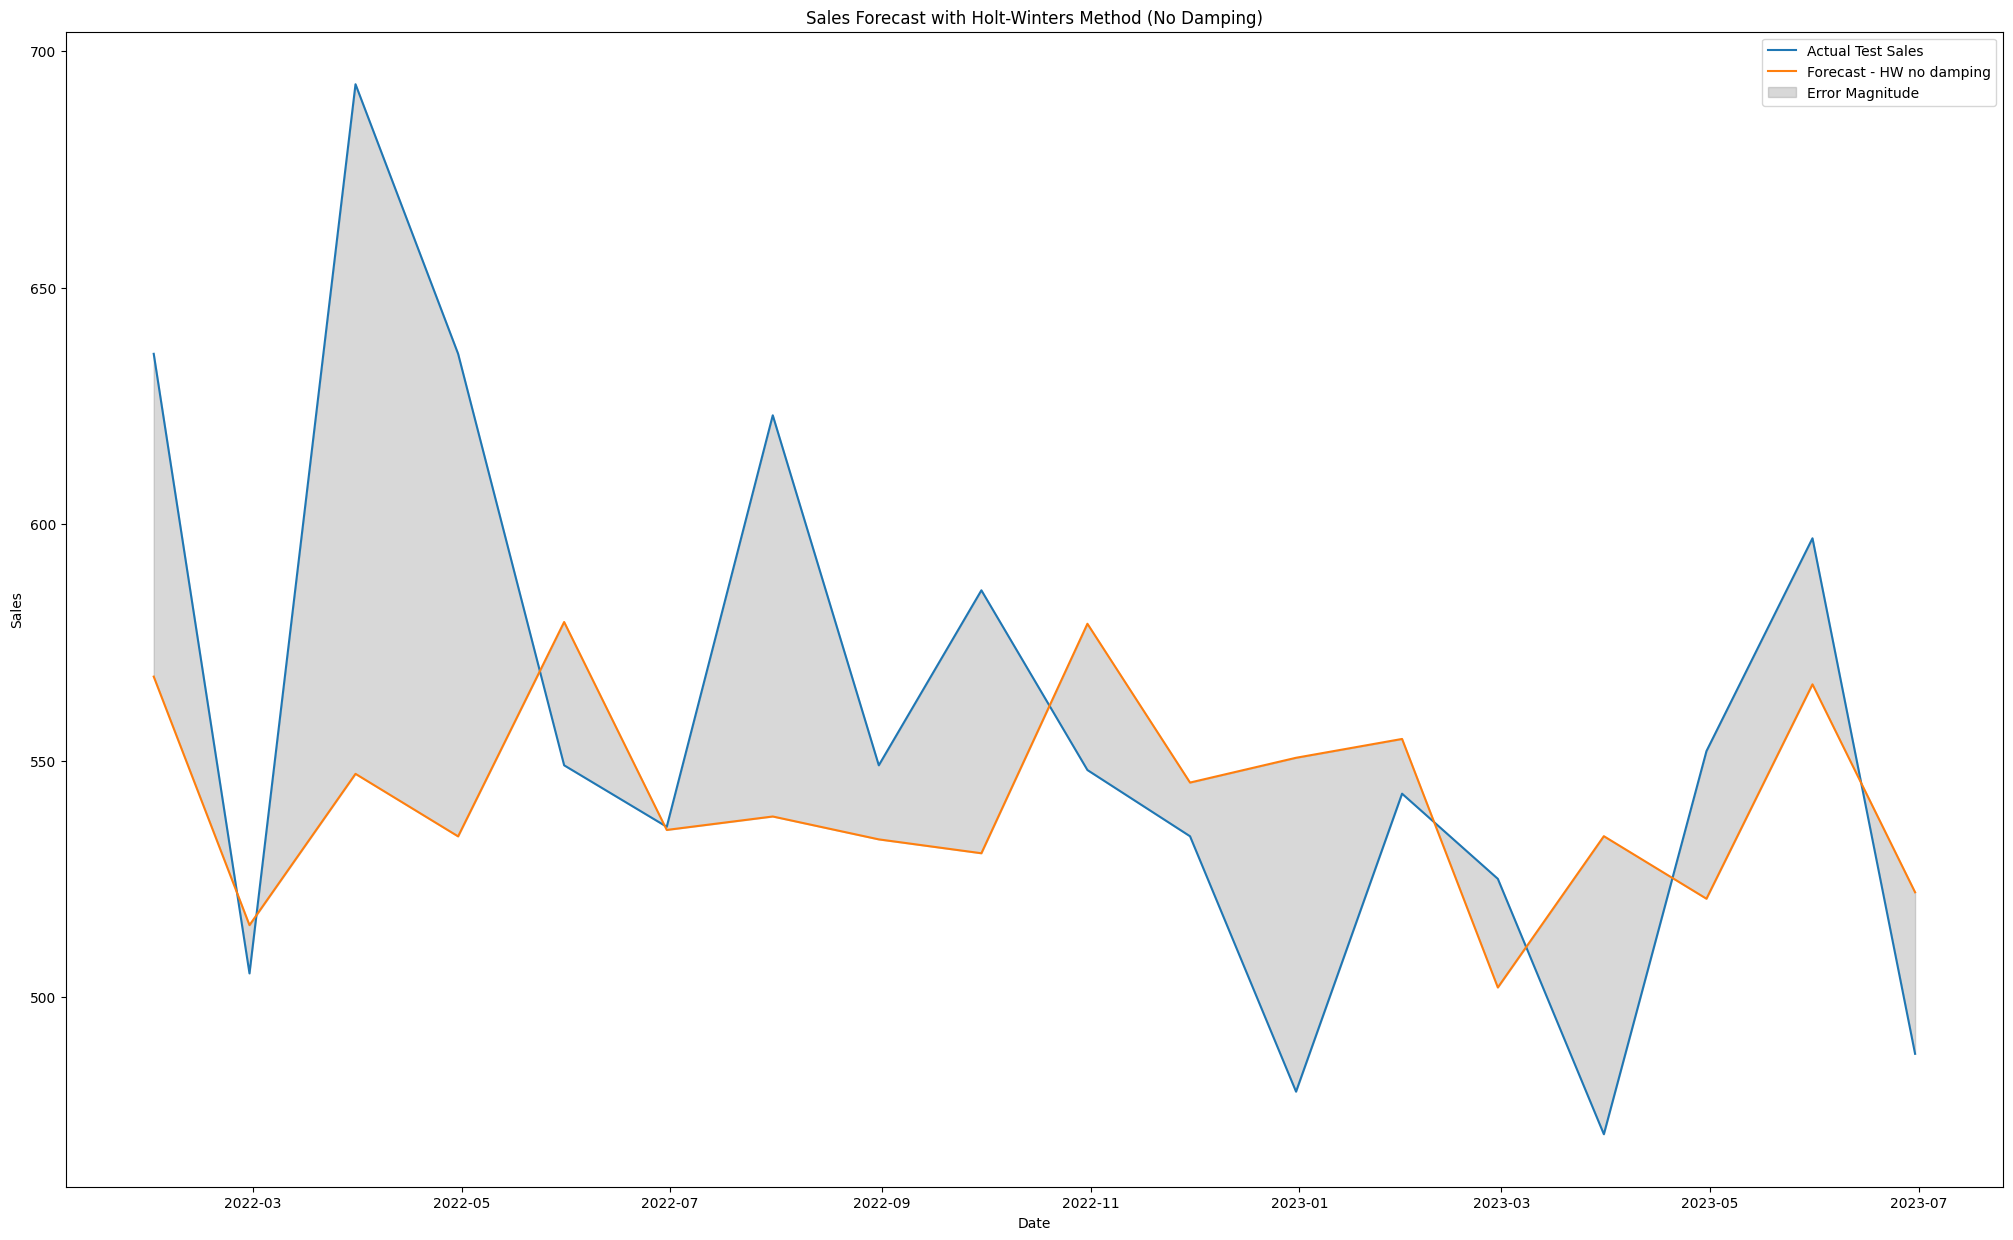

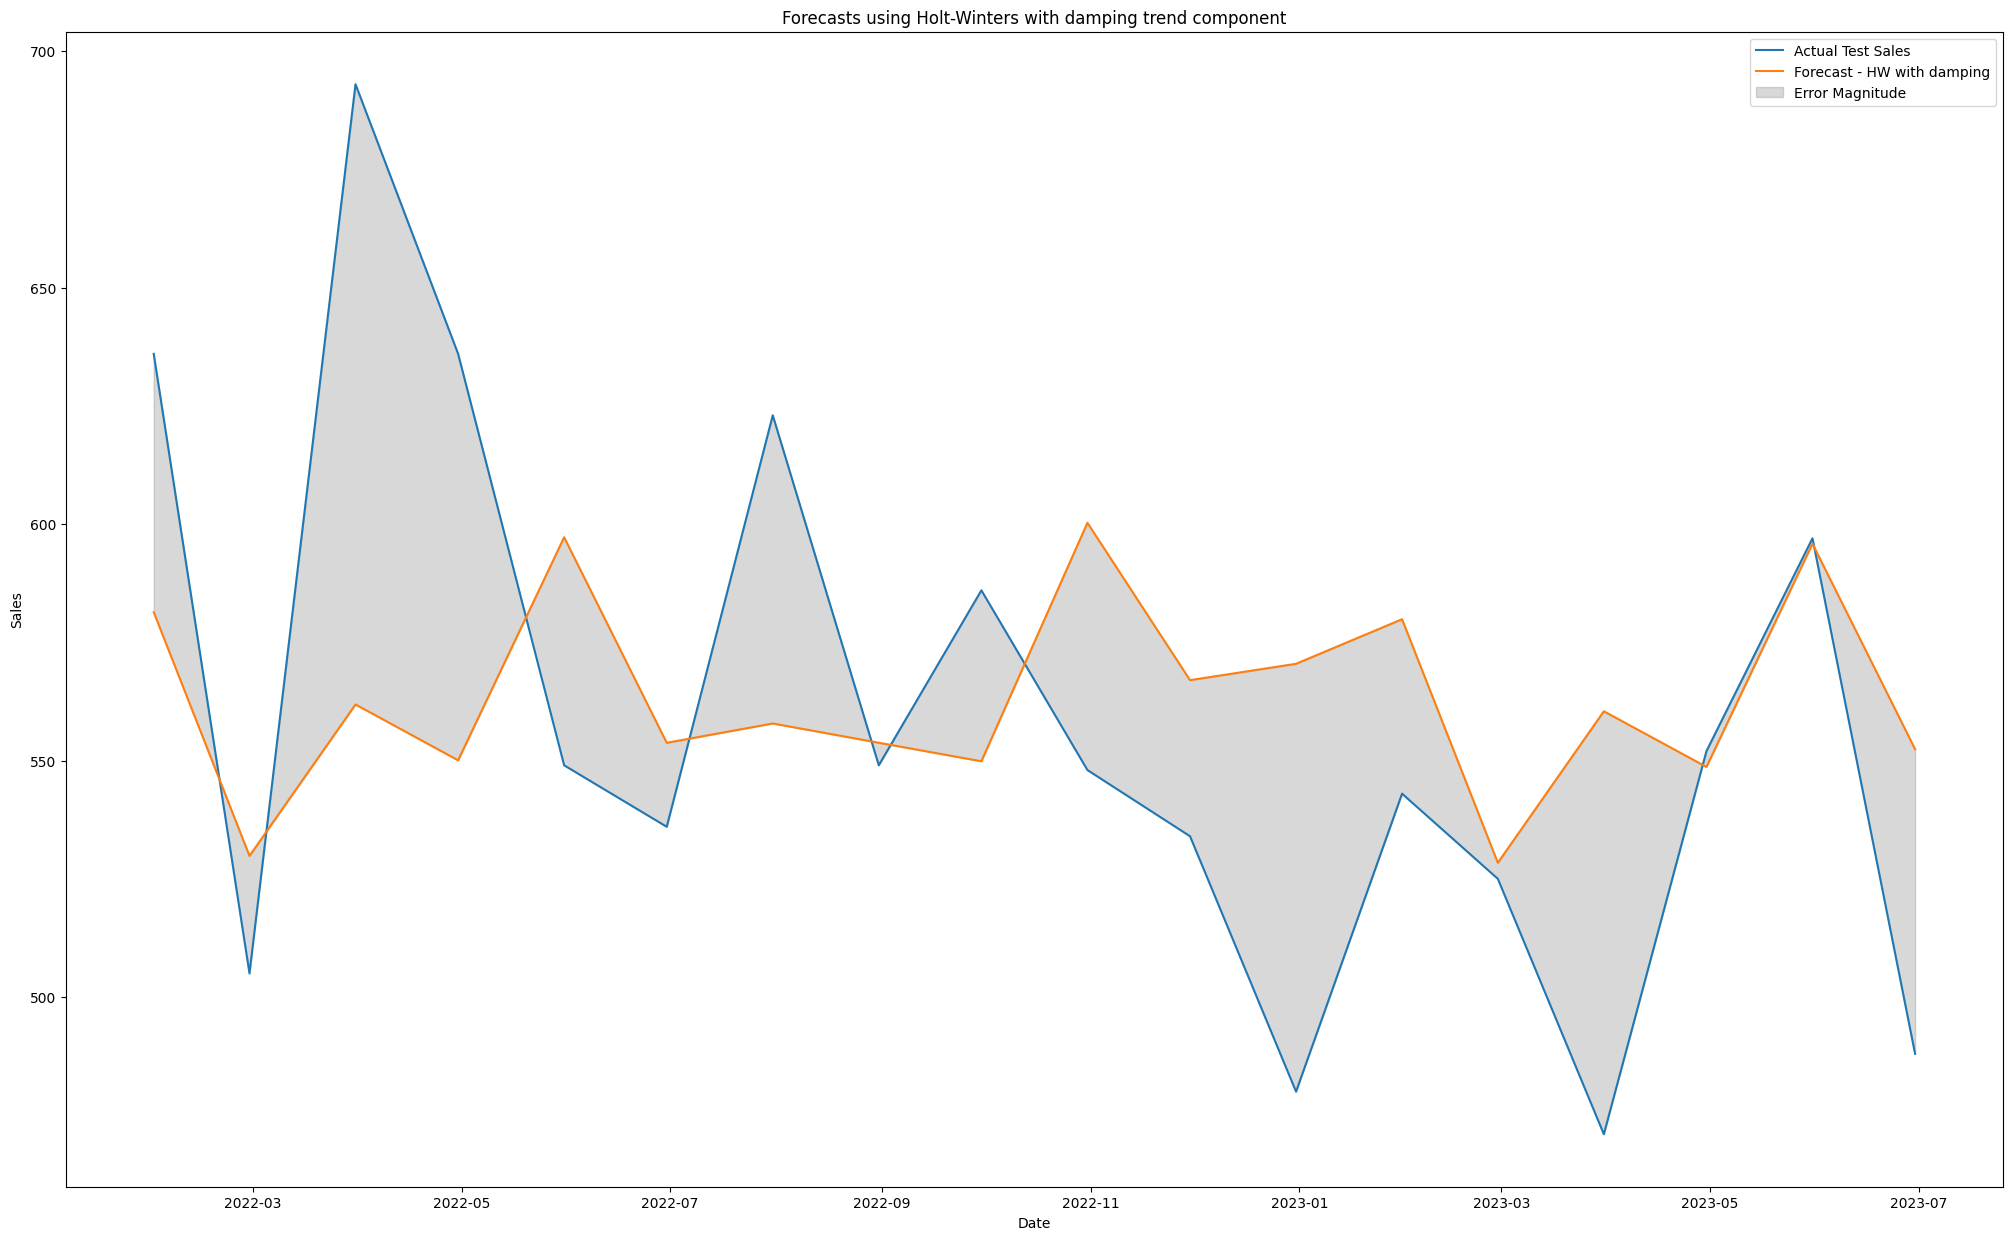

In [4]:
plt.figure(figsize=(25,15))
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_1, label='Forecast - HW no damping')
plt.fill_between(test_df.index, test_df['sales'], pred_fit_1, color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Sales Forecast with Holt-Winters Method (No Damping)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
plt.figure(figsize=(25,15))
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_2, label='Forecast - HW with damping')
plt.fill_between(test_df.index, test_df['sales'], pred_fit_2, color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Forecasts using Holt-Winters with damping trend component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

<b>5. Evaluating Forecasting Performance: Comprehensive Metrics for Holt-Winters Models:</b>

- These metrics offer insights into the model's error magnitude, fit, and         predictive accuracy.
  <b>I. MAE (Mean Absolute Error):</b> Average of absolute forecast errors;             lower values are better, less sensitive to outliers.<br>
  <b>II. RMSE (Root Mean Squared Error):</b> Square root of average squared errors;      emphasizes larger errors, more outlier-sensitive.<br>
  <b>III .R² (R-squared):</b> Proportion of variance in sales explained by the            model; closer to 1 indicates better fit.<br>
  <b>IV. Accuracy (Percentage of R²):</b> R² expressed in percentage, giving an          intuitive measure of model performance.<br>
  <b>V. Adjusted R-squared:</b> R² adjusted for the number of predictors,              providing a more accurate measure for models with multiple predictors.<br>

In [5]:
from sklearn.metrics import median_absolute_error, explained_variance_score
def msle(y_true, y_pred): 
    return mean_squared_error(np.log1p(y_true), np.log1p(y_pred))
def mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100
def adjusted_r2(r_squared, n, k): 
    return 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
def calculate_metrics(test_df, predictions):
    mae = np.mean(np.abs(test_df['sales'] - predictions))
    rmse = sqrt(mean_squared_error(test_df['sales'], predictions))
    r2 = r2_score(test_df['sales'], predictions)
    accuracy = r2 * 100  
    return mae, rmse, r2, accuracy
mae_1, rmse_1, r2_1, accuracy_1 = calculate_metrics(test_df, pred_fit_1)
mae_2, rmse_2, r2_2, accuracy_2 = calculate_metrics(test_df, pred_fit_2)
total_actual_sales = test_df['sales'].sum()
total_predicted_sales_no_damping = pred_fit_1.sum()
total_predicted_sales_with_damping = pred_fit_2.sum()
results_hw = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R2', 'Accuracy'],
    'Value (No Damping)': [mae_1, rmse_1, r2_1, accuracy_1],
    'Value (With Damping)': [mae_2, rmse_2, r2_2, accuracy_2]
})
print("Results for Holt-Winters Model:")
display(results_hw)
print("\nTotal Actual Sales: {:.2f}".format(total_actual_sales))
print("Total Predicted Sales (No Damping): {:.2f}".format(total_predicted_sales_no_damping))
print("Total Predicted Sales (With Damping): {:.2f}".format(total_predicted_sales_with_damping))

Results for Holt-Winters Model:


,Metric,Value (No Damping),Value (With Damping)
0,MAE,45.555732,46.831468
1,RMSE,58.535455,58.659223
2,R2,-0.011827,-0.016110
3,Accuracy,-1.182710,-1.611046



Total Actual Sales: 10051.00
Total Predicted Sales (No Damping): 9755.23
Total Predicted Sales (With Damping): 10138.91


________________________________________________________________________________________________________________________________
# Forecast For The Second Item:
- The same previous steps will be repated.

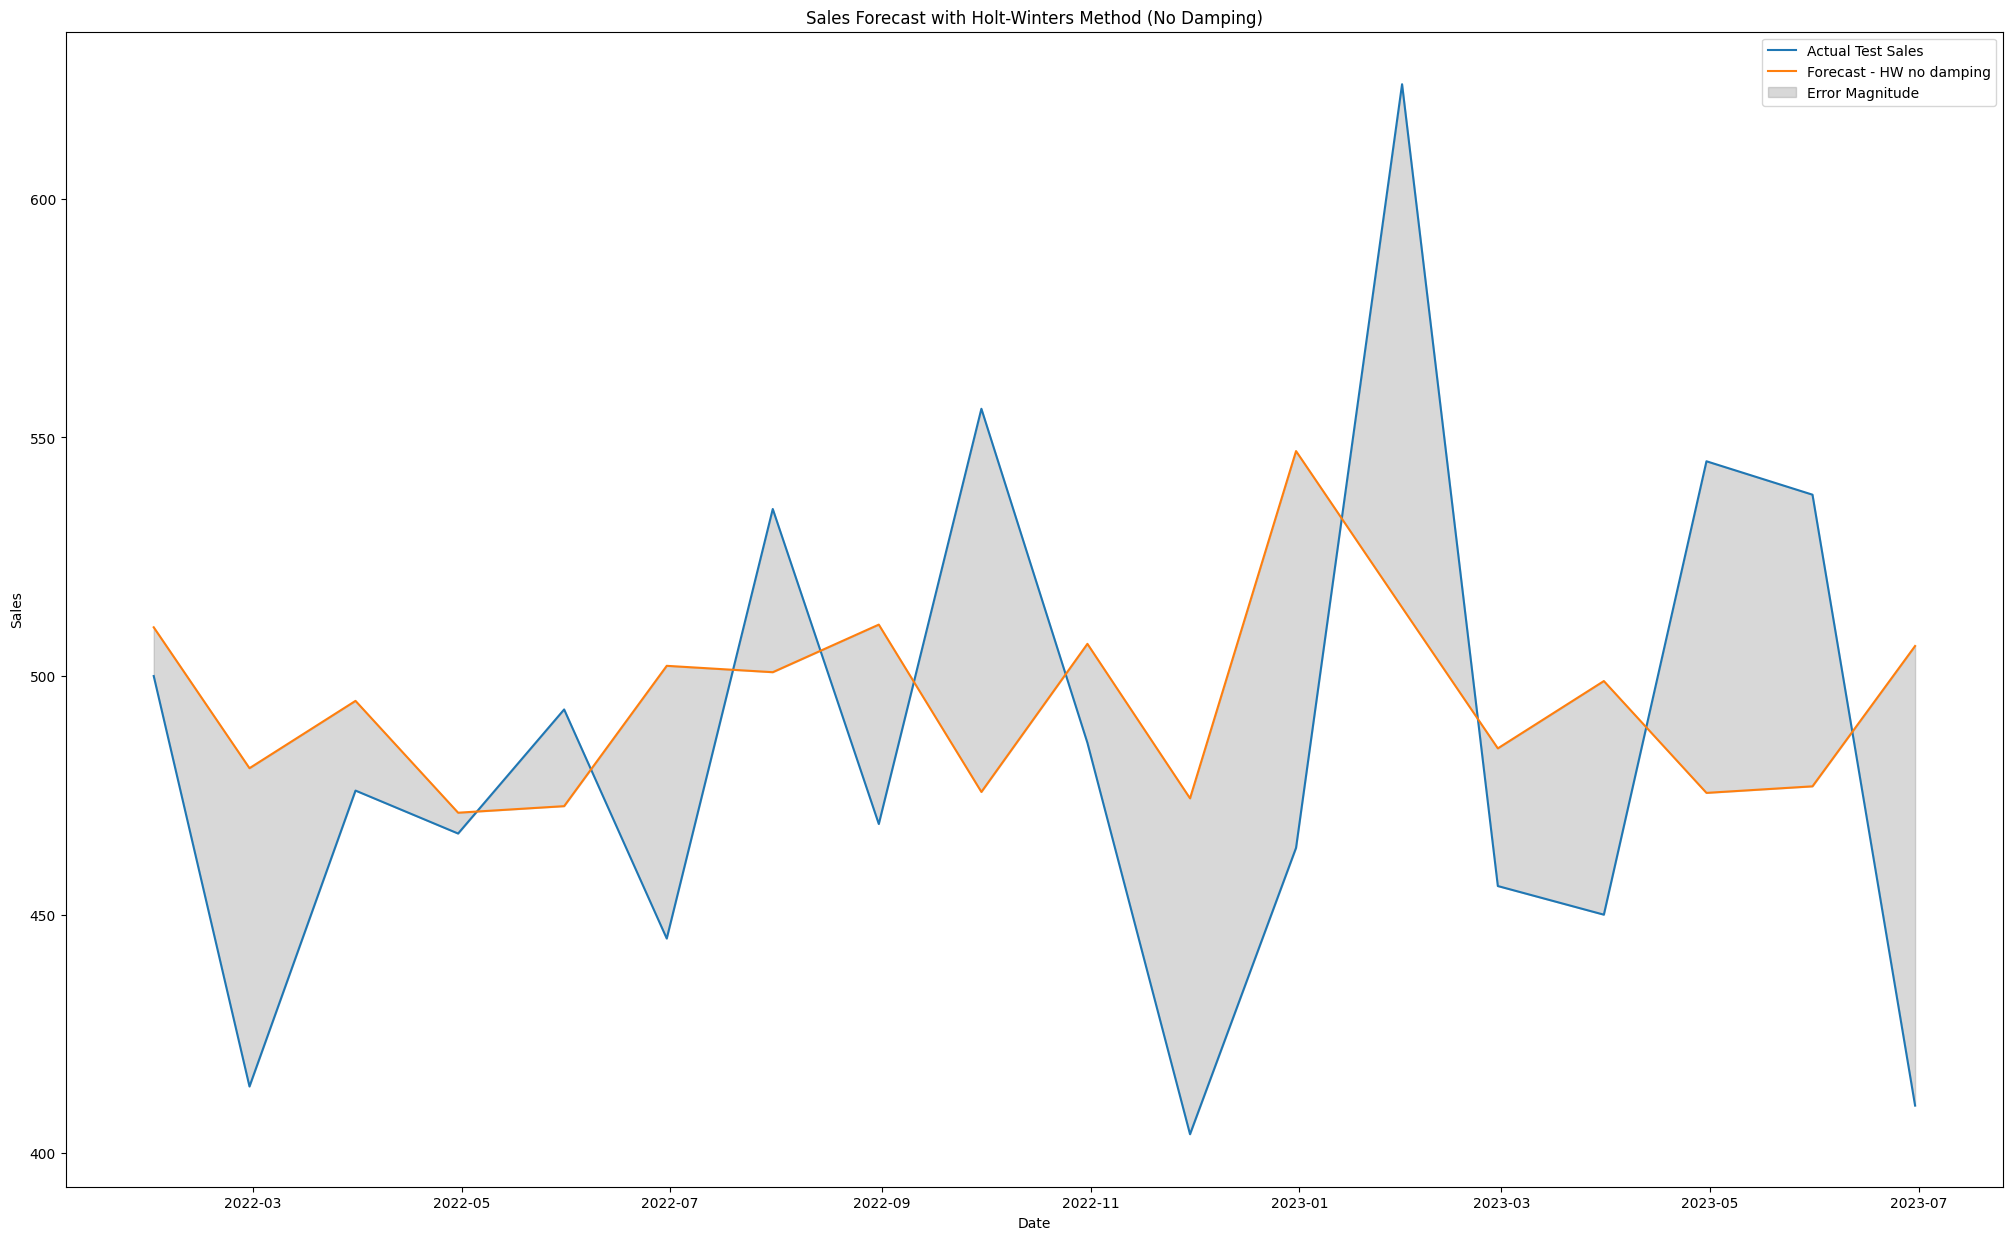

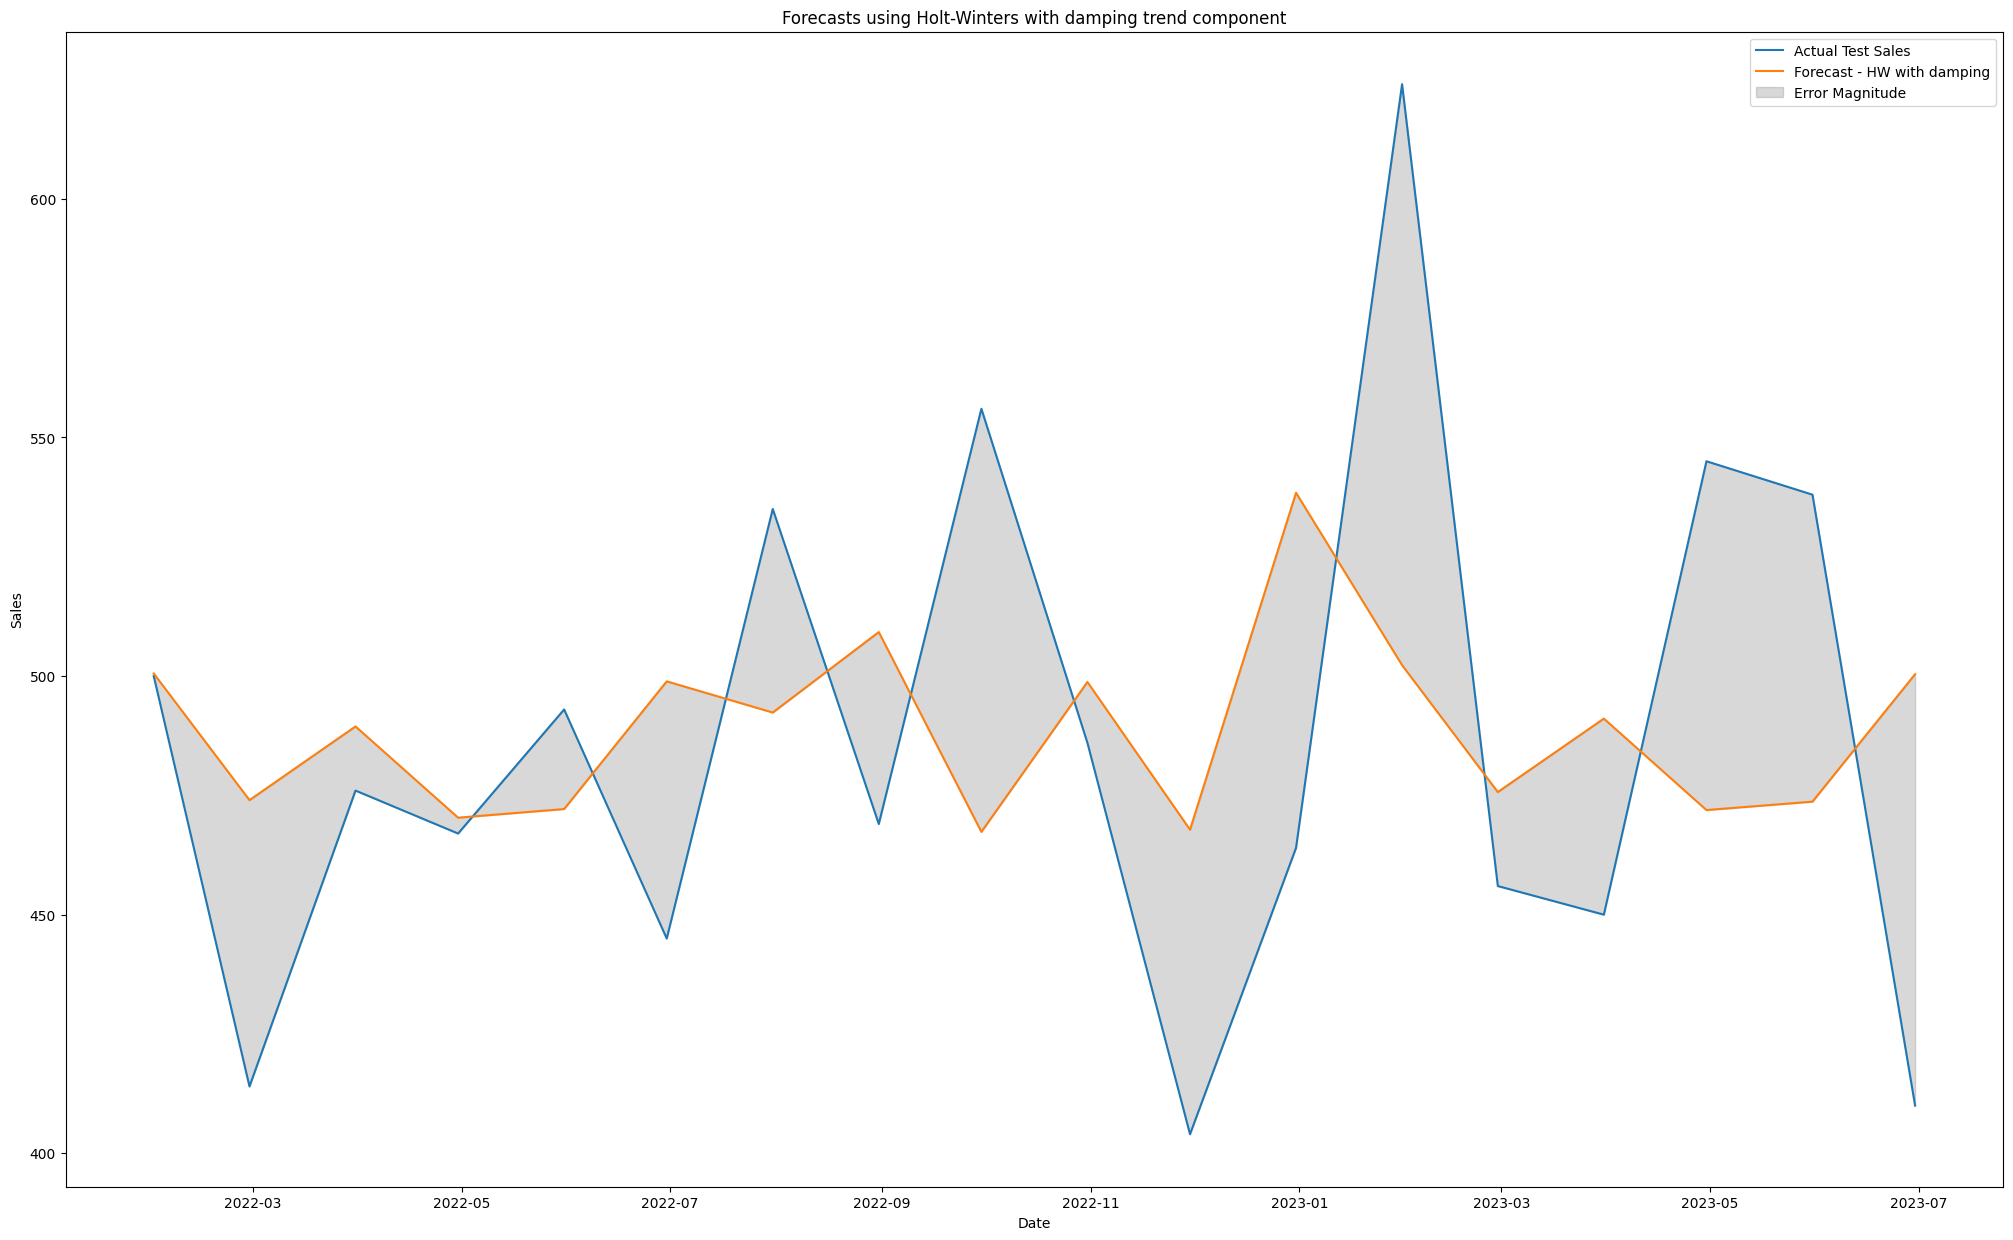

Results for Holt-Winters Model:


,Metric,Value (No Damping),Value (With Damping)
0,MAE,51.238901,49.156190
1,RMSE,59.319073,59.035779
2,R2,-0.140071,-0.129208
3,Accuracy,-14.007124,-12.920779



Total Actual Sales: 8732.00
Total Predicted Sales (No Damping): 8904.36
Total Predicted Sales (With Damping): 8794.24


In [6]:
df = pd.read_csv('C:/Users/moham/Desktop/ItemTwoMS.csv')
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df.set_index('date', inplace=True)
df = df[(df['store'] == 1)]
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]
hw_model_1 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit_1 = hw_model_1.fit(optimized=True)
pred_fit_1 = hw_fit_1.forecast(steps=len(test_df))
pred_fit_1.index = test_df.index
hw_model_2 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12, damped=True)
hw_fit_2 = hw_model_2.fit(optimized=True)
pred_fit_2 = hw_fit_2.forecast(steps=len(test_df))
pred_fit_2.index = test_df.index
plt.figure(figsize=(25,15))
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_1, label='Forecast - HW no damping')
plt.fill_between(test_df.index, test_df['sales'], pred_fit_1, color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Sales Forecast with Holt-Winters Method (No Damping)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
plt.figure(figsize=(25,15))
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_2, label='Forecast - HW with damping')
plt.fill_between(test_df.index, test_df['sales'], pred_fit_2, color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Forecasts using Holt-Winters with damping trend component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
from sklearn.metrics import median_absolute_error, explained_variance_score
def msle(y_true, y_pred): 
    return mean_squared_error(np.log1p(y_true), np.log1p(y_pred))
def mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100
def adjusted_r2(r_squared, n, k): 
    return 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
def calculate_metrics(test_df, predictions):
    mae = np.mean(np.abs(test_df['sales'] - predictions))
    rmse = sqrt(mean_squared_error(test_df['sales'], predictions))
    r2 = r2_score(test_df['sales'], predictions)
    accuracy = r2 * 100  
    return mae, rmse, r2, accuracy
mae_1, rmse_1, r2_1, accuracy_1 = calculate_metrics(test_df, pred_fit_1)
mae_2, rmse_2, r2_2, accuracy_2 = calculate_metrics(test_df, pred_fit_2)
total_actual_sales = test_df['sales'].sum()
total_predicted_sales_no_damping = pred_fit_1.sum()
total_predicted_sales_with_damping = pred_fit_2.sum()
results_hw = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R2', 'Accuracy'],
    'Value (No Damping)': [mae_1, rmse_1, r2_1, accuracy_1],
    'Value (With Damping)': [mae_2, rmse_2, r2_2, accuracy_2]
})
print("Results for Holt-Winters Model:")
display(results_hw)
print("\nTotal Actual Sales: {:.2f}".format(total_actual_sales))
print("Total Predicted Sales (No Damping): {:.2f}".format(total_predicted_sales_no_damping))
print("Total Predicted Sales (With Damping): {:.2f}".format(total_predicted_sales_with_damping))

________________________________________________________________________________________________________________________________
# Forecast For The Third Item:
- The same previous steps will be repated.

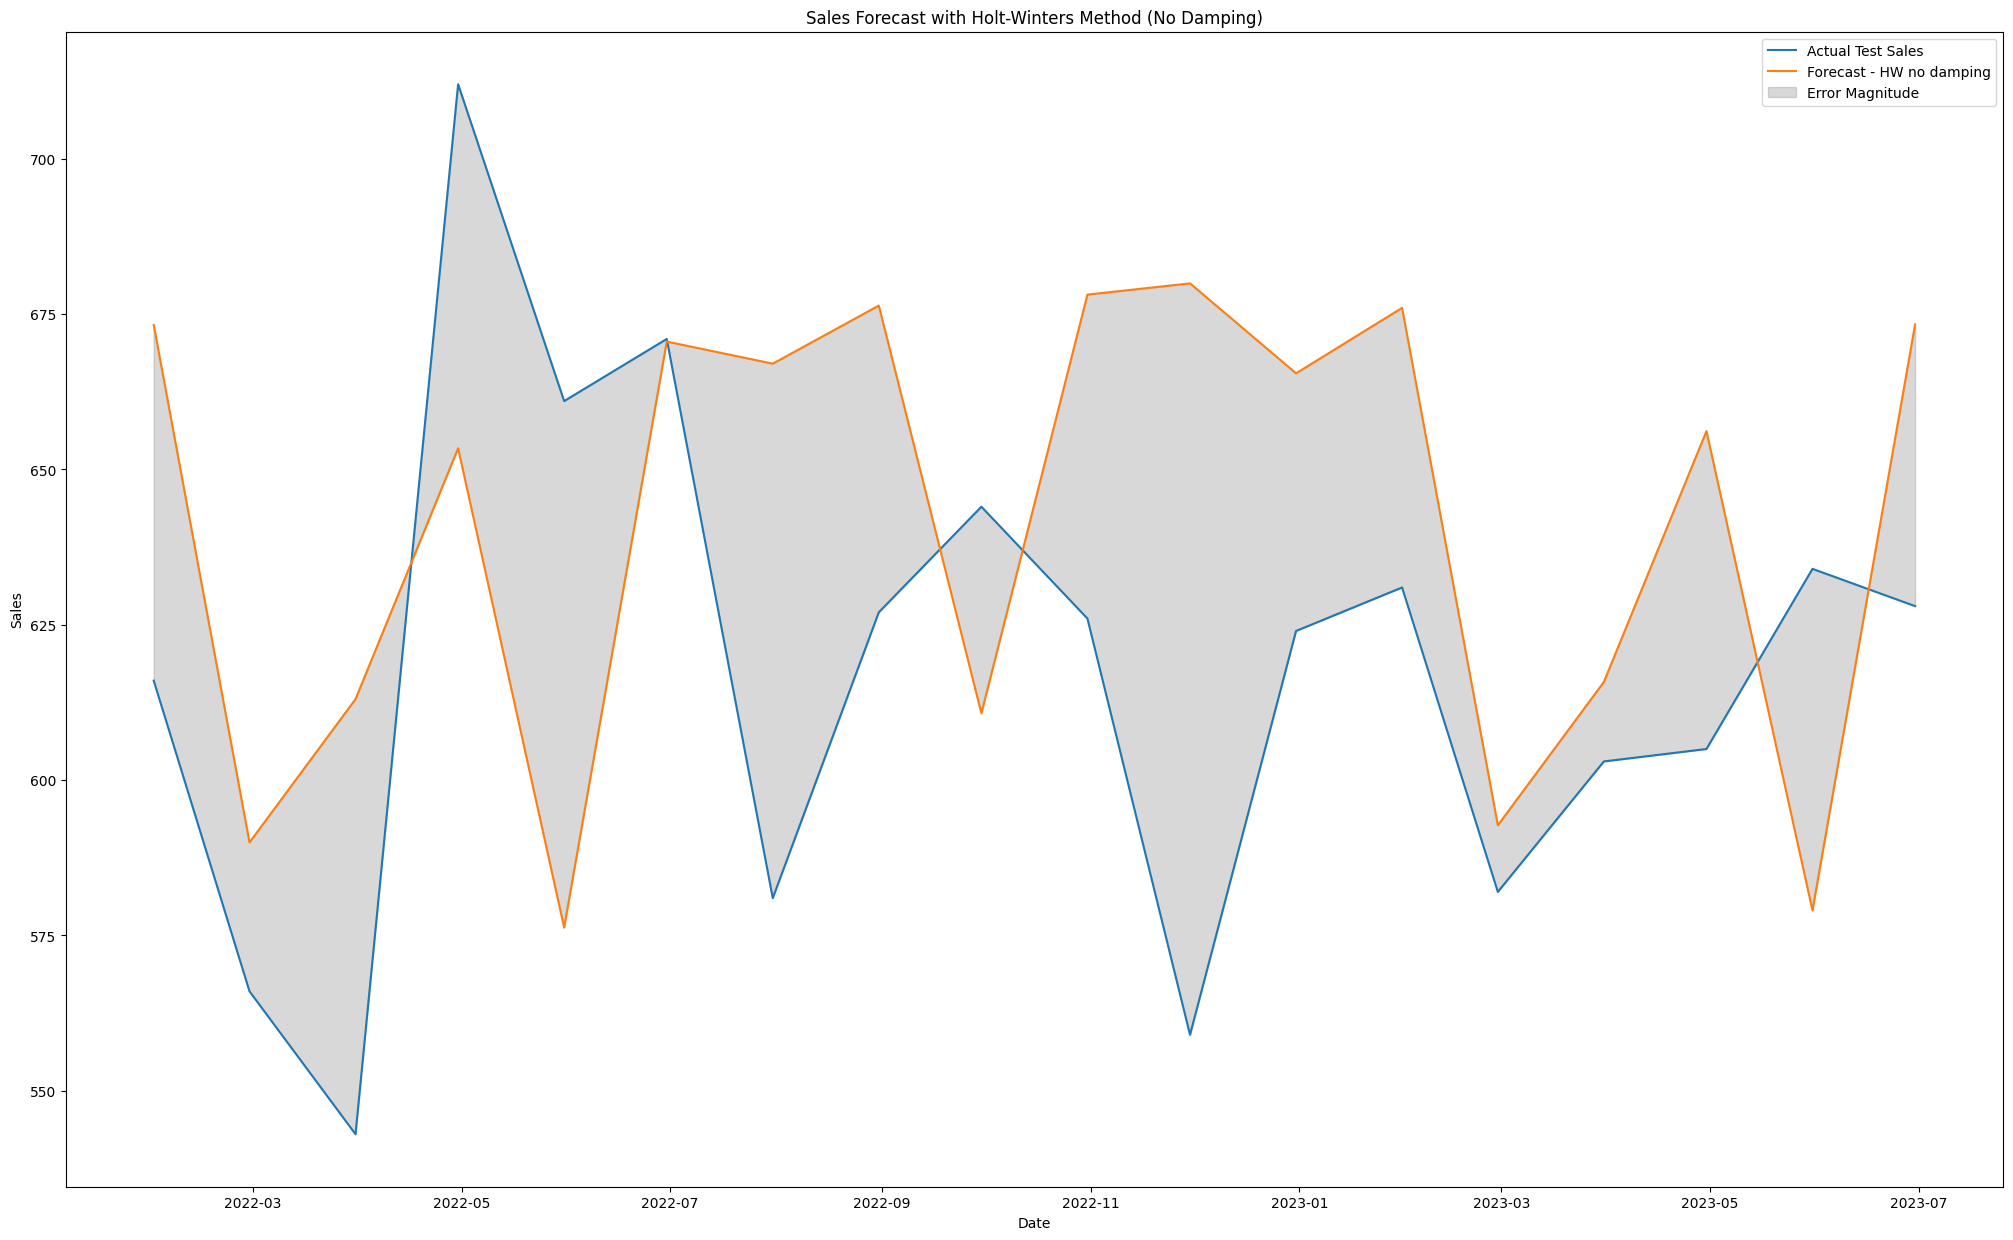

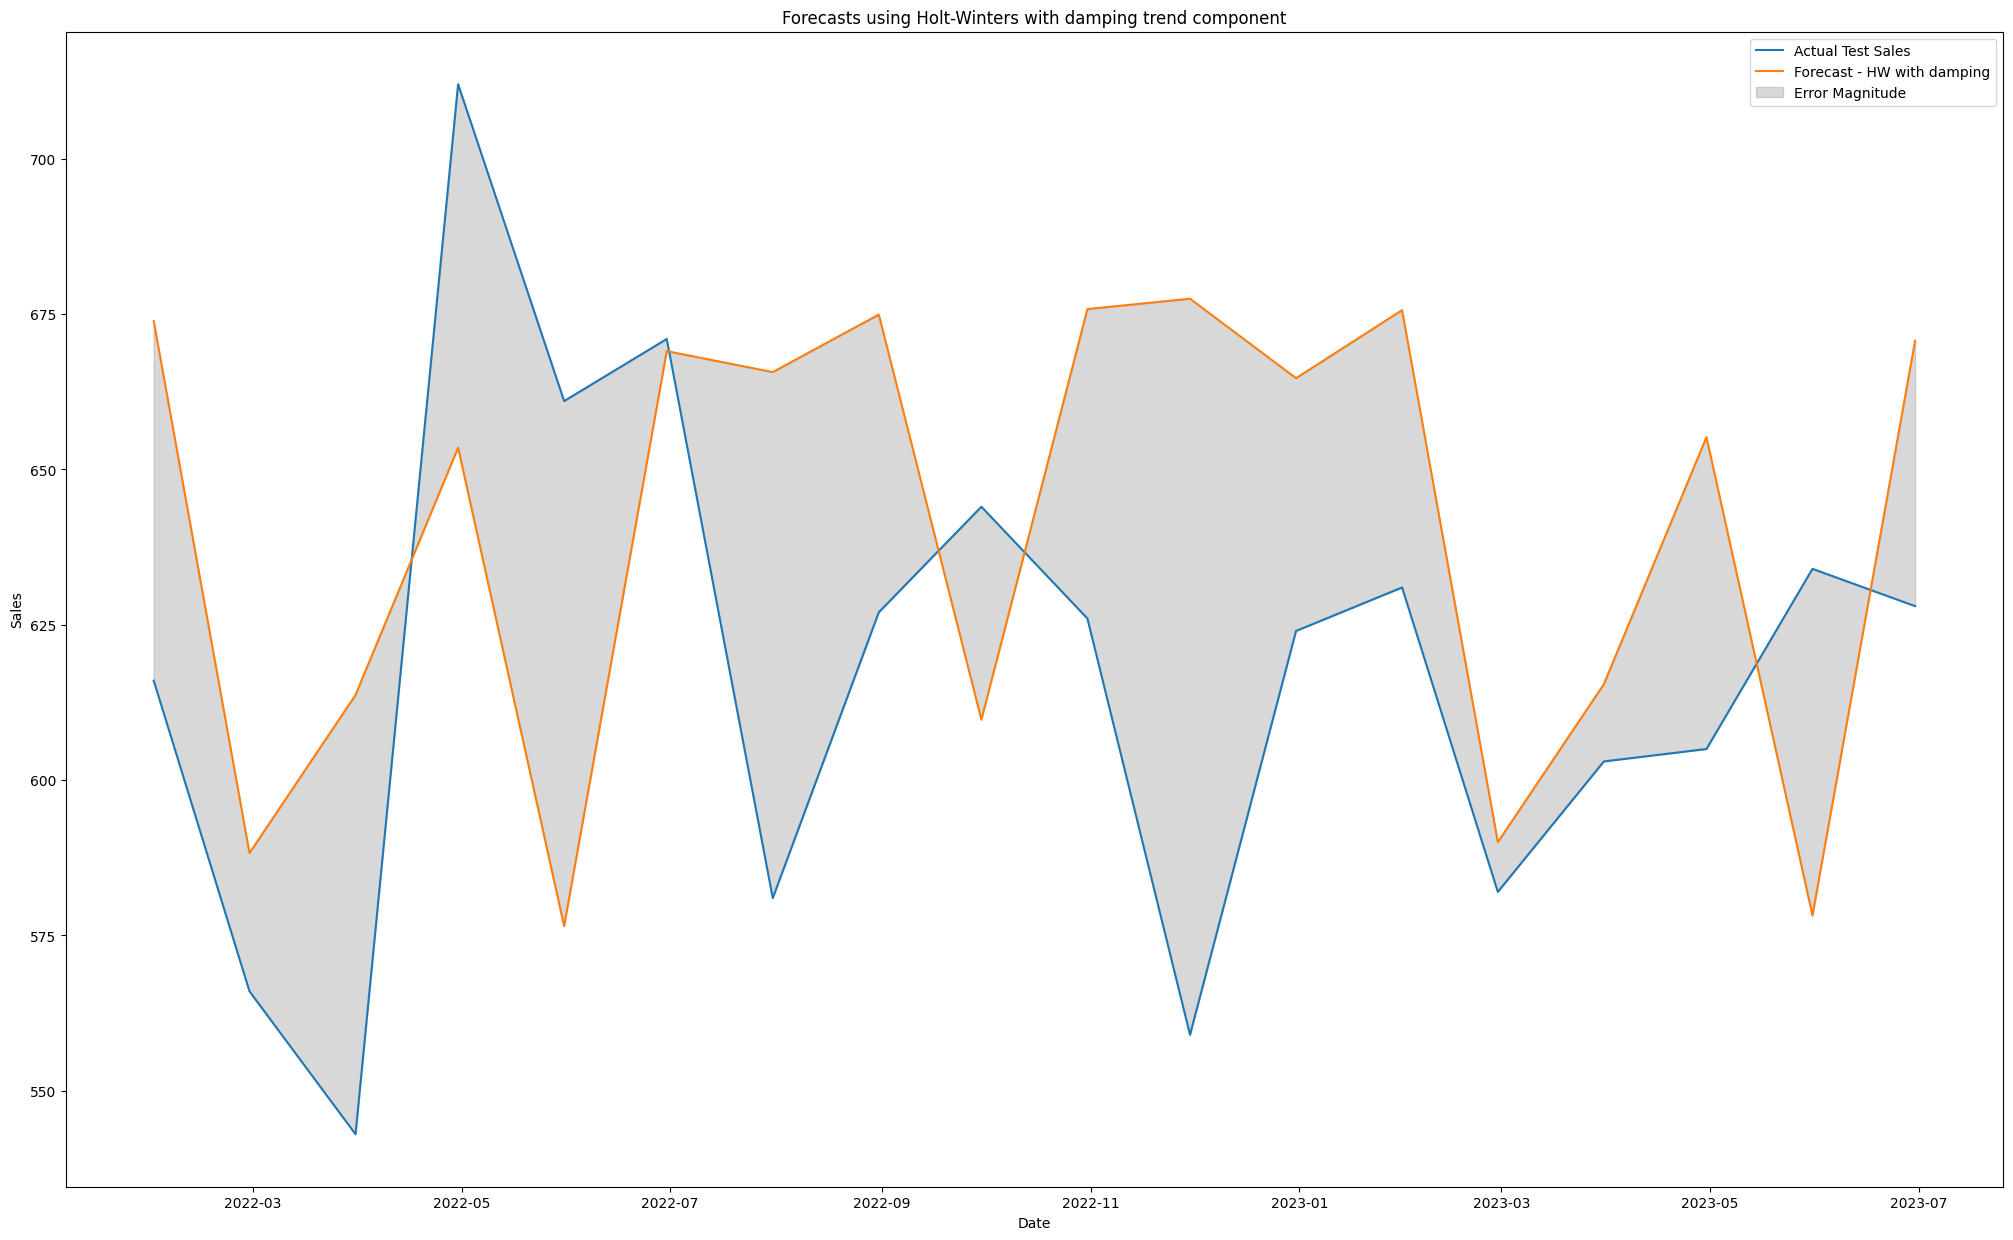

Results for Holt-Winters Model:


,Metric,Value (No Damping),Value (With Damping)
0,MAE,49.899657,49.191046
1,RMSE,57.435192,56.712150
2,R2,-0.996432,-0.946482
3,Accuracy,-99.643162,-94.648249



Total Actual Sales: 11113.00
Total Predicted Sales (No Damping): 11547.26
Total Predicted Sales (With Damping): 11528.36


In [7]:
df = pd.read_csv('C:/Users/moham/Desktop/ItemThreeMS.csv')
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df.set_index('date', inplace=True)
df = df[(df['store'] == 1)]
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]
hw_model_1 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit_1 = hw_model_1.fit(optimized=True)
pred_fit_1 = hw_fit_1.forecast(steps=len(test_df))
pred_fit_1.index = test_df.index
hw_model_2 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12, damped=True)
hw_fit_2 = hw_model_2.fit(optimized=True)
pred_fit_2 = hw_fit_2.forecast(steps=len(test_df))
pred_fit_2.index = test_df.index
plt.figure(figsize=(25,15))
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_1, label='Forecast - HW no damping')
plt.fill_between(test_df.index, test_df['sales'], pred_fit_1, color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Sales Forecast with Holt-Winters Method (No Damping)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
plt.figure(figsize=(25,15))
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_2, label='Forecast - HW with damping')
plt.fill_between(test_df.index, test_df['sales'], pred_fit_2, color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Forecasts using Holt-Winters with damping trend component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
from sklearn.metrics import median_absolute_error, explained_variance_score
def msle(y_true, y_pred): 
    return mean_squared_error(np.log1p(y_true), np.log1p(y_pred))
def mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100
def adjusted_r2(r_squared, n, k): 
    return 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
def calculate_metrics(test_df, predictions):
    mae = np.mean(np.abs(test_df['sales'] - predictions))
    rmse = sqrt(mean_squared_error(test_df['sales'], predictions))
    r2 = r2_score(test_df['sales'], predictions)
    accuracy = r2 * 100  
    return mae, rmse, r2, accuracy
mae_1, rmse_1, r2_1, accuracy_1 = calculate_metrics(test_df, pred_fit_1)
mae_2, rmse_2, r2_2, accuracy_2 = calculate_metrics(test_df, pred_fit_2)
total_actual_sales = test_df['sales'].sum()
total_predicted_sales_no_damping = pred_fit_1.sum()
total_predicted_sales_with_damping = pred_fit_2.sum()
results_hw = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R2', 'Accuracy'],
    'Value (No Damping)': [mae_1, rmse_1, r2_1, accuracy_1],
    'Value (With Damping)': [mae_2, rmse_2, r2_2, accuracy_2]
})
print("Results for Holt-Winters Model:")
display(results_hw)
print("\nTotal Actual Sales: {:.2f}".format(total_actual_sales))
print("Total Predicted Sales (No Damping): {:.2f}".format(total_predicted_sales_no_damping))
print("Total Predicted Sales (With Damping): {:.2f}".format(total_predicted_sales_with_damping))

________________________________________________________________________________________________________________________________
# Forecast For The Fourth Item:
- The same previous steps will be repated.

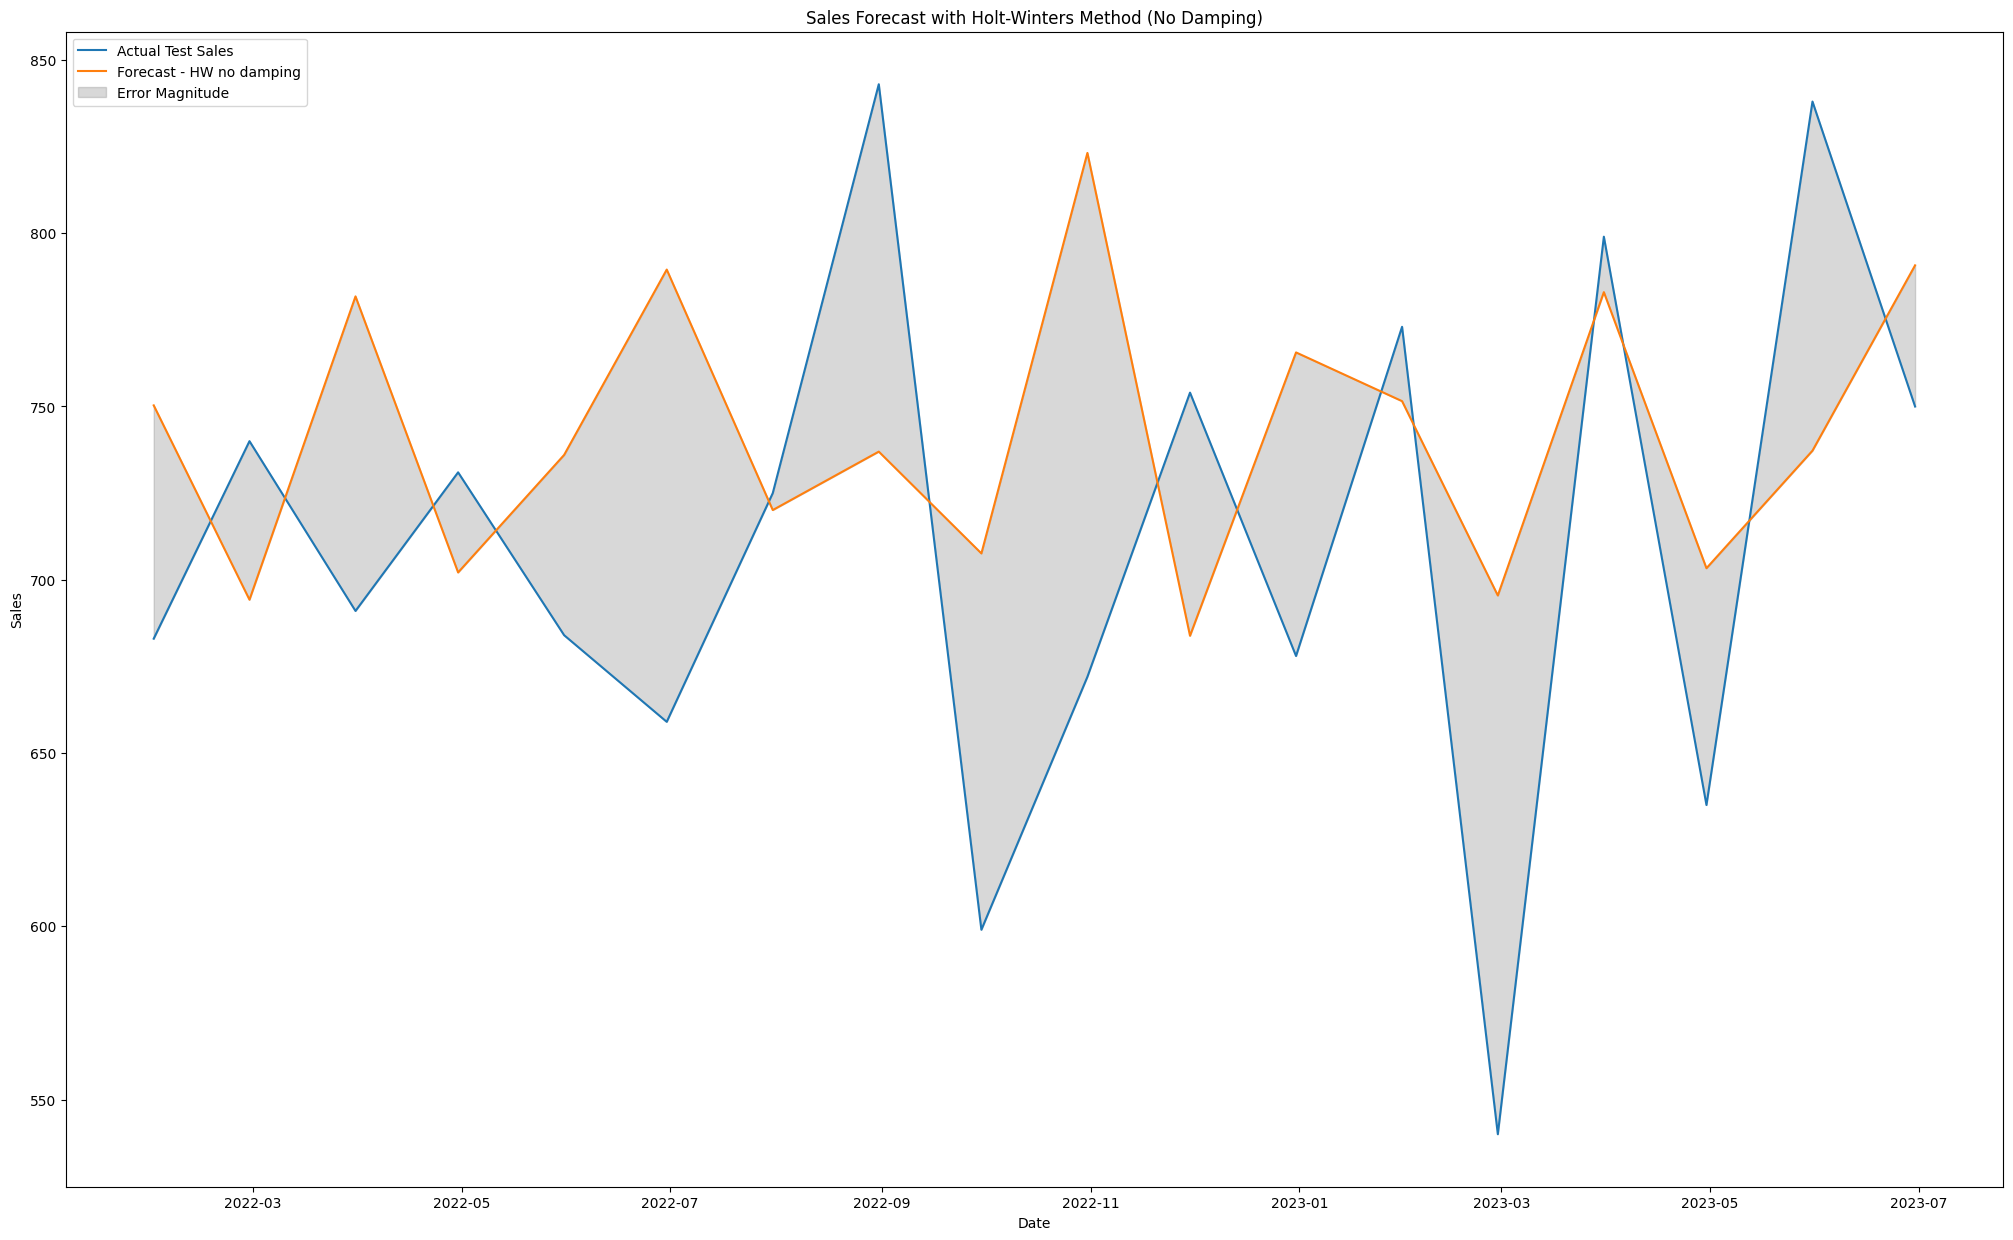

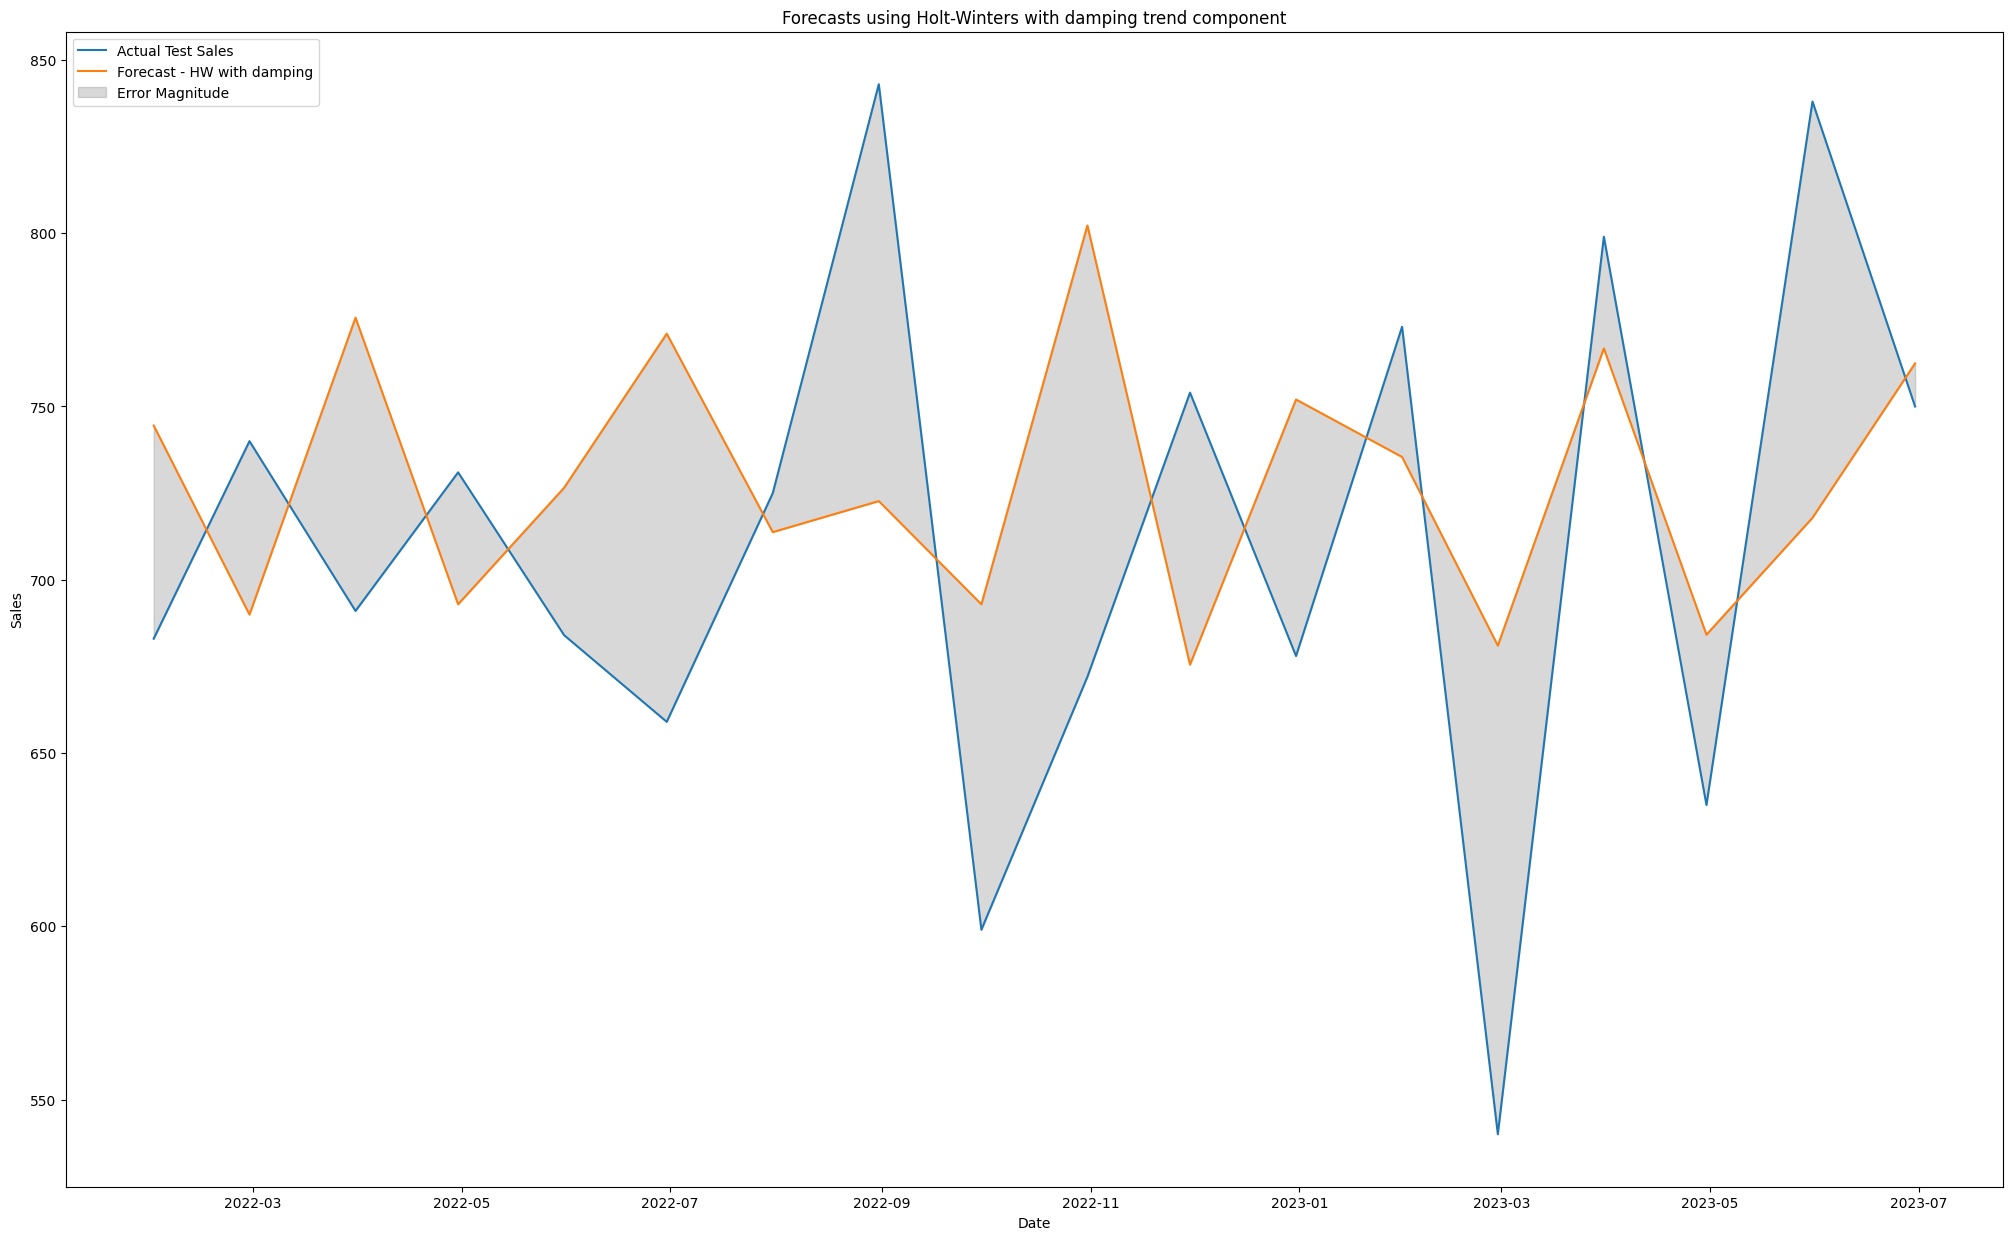

Results for Holt-Winters Model:


,Metric,Value (No Damping),Value (With Damping)
0,MAE,74.804405,71.640678
1,RMSE,86.703808,81.855364
2,R2,-0.291982,-0.151528
3,Accuracy,-29.198226,-15.152798



Total Actual Sales: 12794.00
Total Predicted Sales (No Damping): 13352.61
Total Predicted Sales (With Damping): 13107.39


In [8]:
df = pd.read_csv('C:/Users/moham/Desktop/ItemFourMS.csv')
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df.set_index('date', inplace=True)
df = df[(df['store'] == 1)]
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]
hw_model_1 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit_1 = hw_model_1.fit(optimized=True)
pred_fit_1 = hw_fit_1.forecast(steps=len(test_df))
pred_fit_1.index = test_df.index
hw_model_2 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12, damped=True)
hw_fit_2 = hw_model_2.fit(optimized=True)
pred_fit_2 = hw_fit_2.forecast(steps=len(test_df))
pred_fit_2.index = test_df.index
plt.figure(figsize=(25,15))
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_1, label='Forecast - HW no damping')
plt.fill_between(test_df.index, test_df['sales'], pred_fit_1, color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Sales Forecast with Holt-Winters Method (No Damping)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
plt.figure(figsize=(25,15))
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_2, label='Forecast - HW with damping')
plt.fill_between(test_df.index, test_df['sales'], pred_fit_2, color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Forecasts using Holt-Winters with damping trend component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
from sklearn.metrics import median_absolute_error, explained_variance_score
def msle(y_true, y_pred): 
    return mean_squared_error(np.log1p(y_true), np.log1p(y_pred))
def mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100
def adjusted_r2(r_squared, n, k): 
    return 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
def calculate_metrics(test_df, predictions):
    mae = np.mean(np.abs(test_df['sales'] - predictions))
    rmse = sqrt(mean_squared_error(test_df['sales'], predictions))
    r2 = r2_score(test_df['sales'], predictions)
    accuracy = r2 * 100  
    return mae, rmse, r2, accuracy
mae_1, rmse_1, r2_1, accuracy_1 = calculate_metrics(test_df, pred_fit_1)
mae_2, rmse_2, r2_2, accuracy_2 = calculate_metrics(test_df, pred_fit_2)
total_actual_sales = test_df['sales'].sum()
total_predicted_sales_no_damping = pred_fit_1.sum()
total_predicted_sales_with_damping = pred_fit_2.sum()
results_hw = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R2', 'Accuracy'],
    'Value (No Damping)': [mae_1, rmse_1, r2_1, accuracy_1],
    'Value (With Damping)': [mae_2, rmse_2, r2_2, accuracy_2]
})
print("Results for Holt-Winters Model:")
display(results_hw)
print("\nTotal Actual Sales: {:.2f}".format(total_actual_sales))
print("Total Predicted Sales (No Damping): {:.2f}".format(total_predicted_sales_no_damping))
print("Total Predicted Sales (With Damping): {:.2f}".format(total_predicted_sales_with_damping))

________________________________________________________________________________________________________________________________
# Forecast For The Fifth Item:
- The same previous steps will be repated.

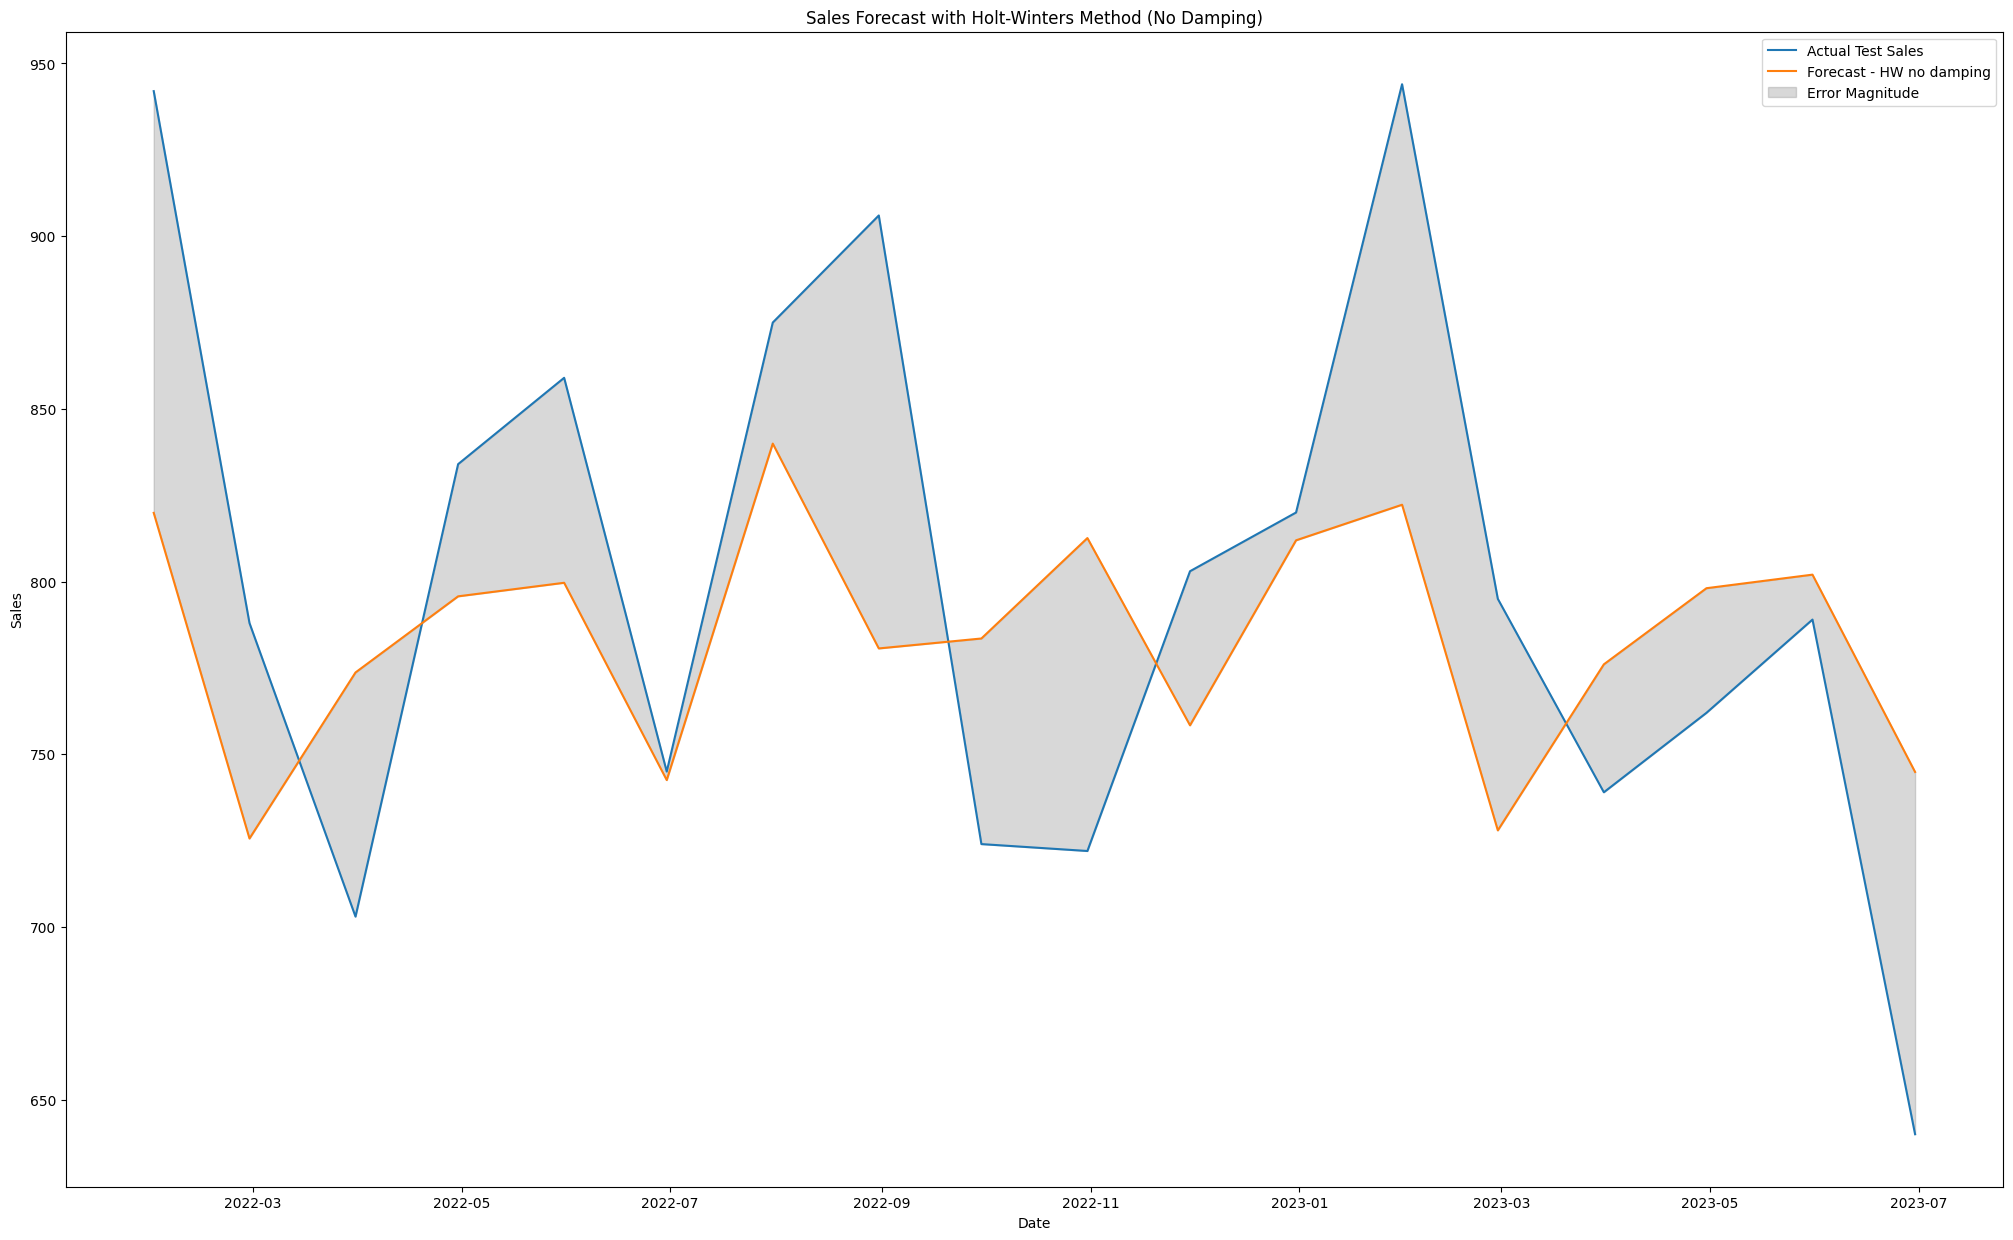

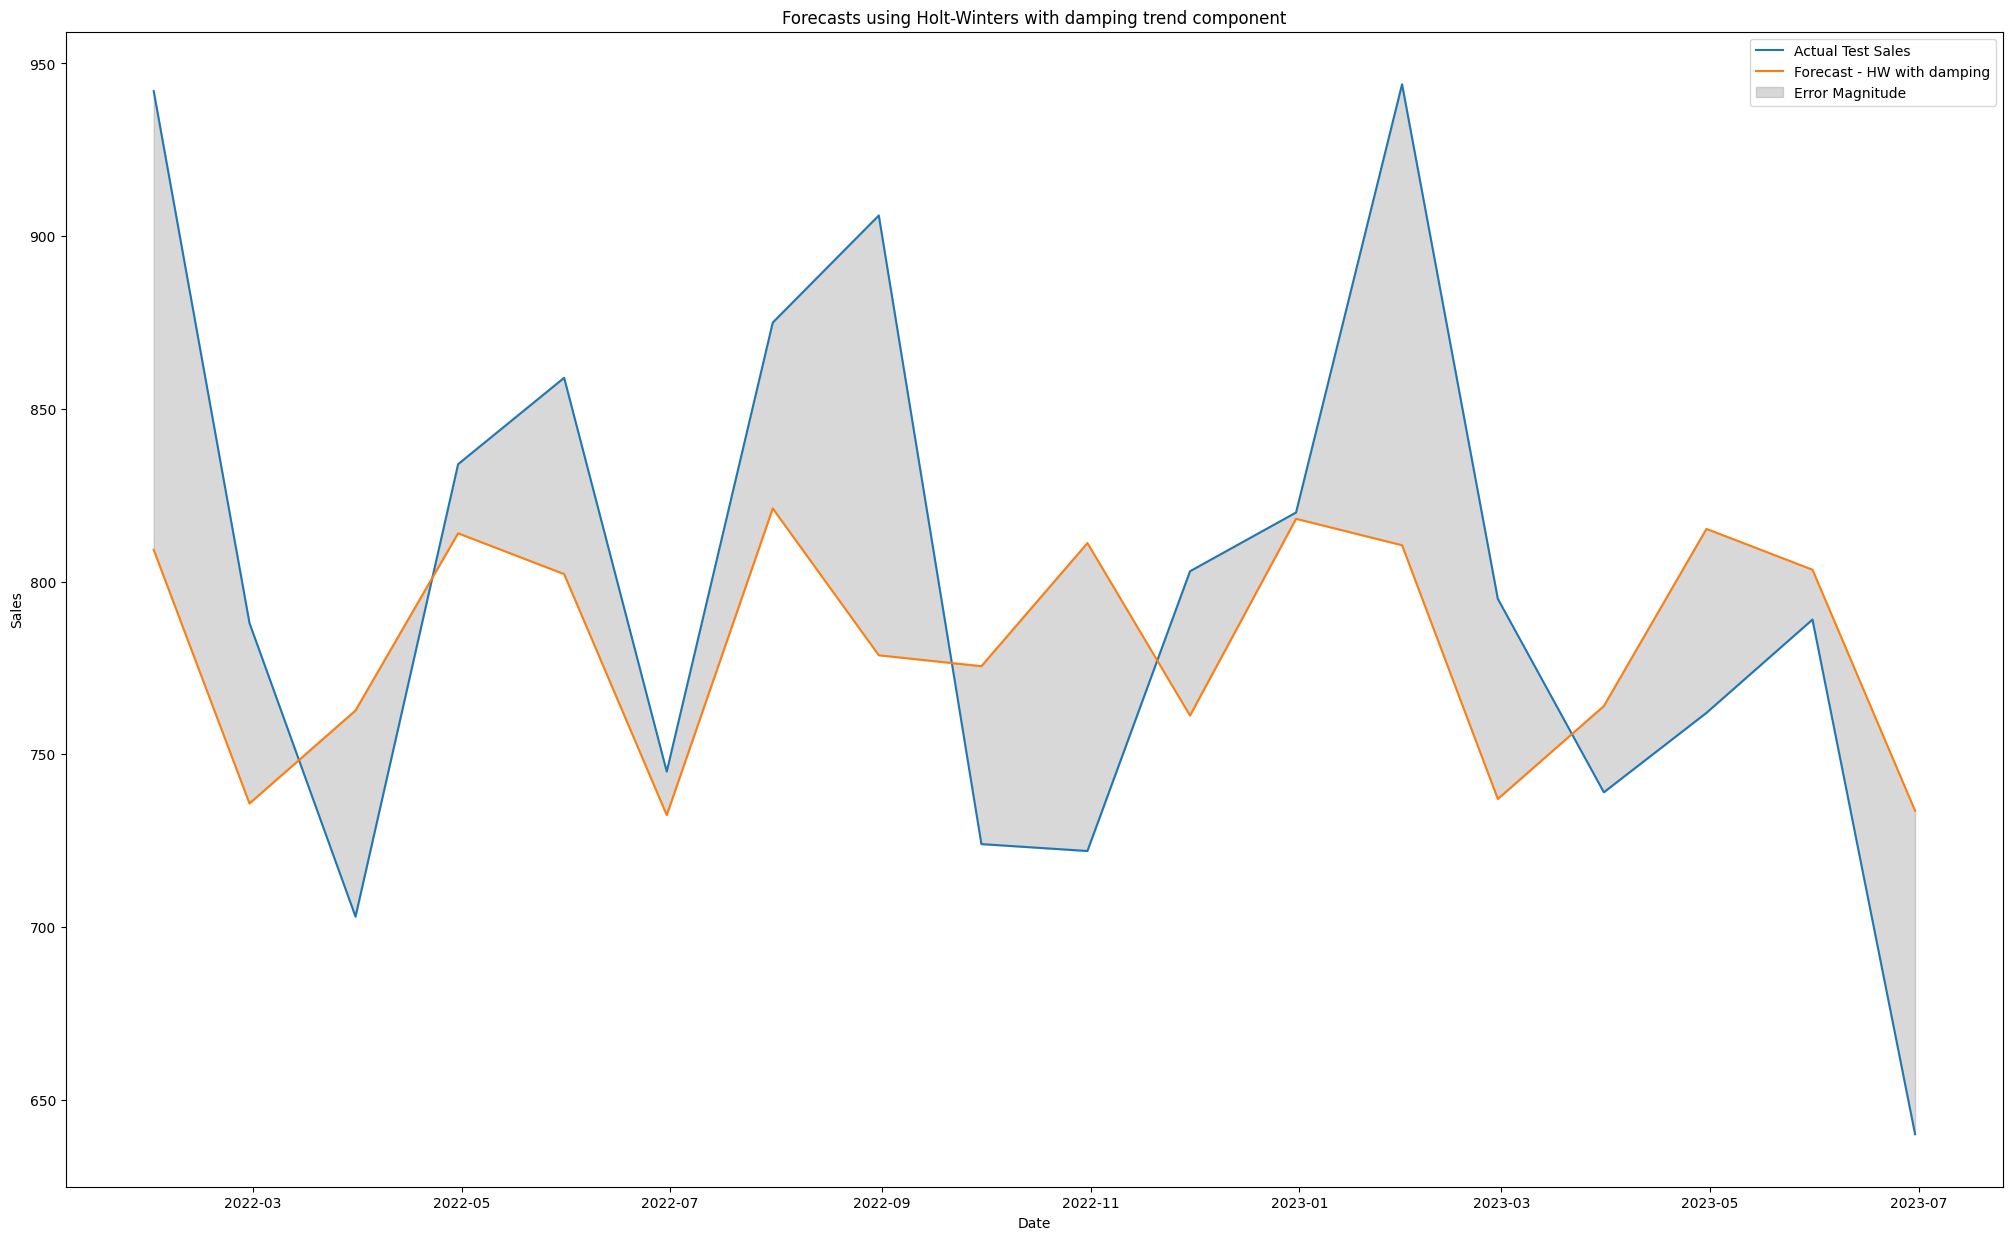

Results for Holt-Winters Model:


,Metric,Value (No Damping),Value (With Damping)
0,MAE,61.014513,59.848144
1,RMSE,71.763426,71.794554
2,R2,0.215409,0.214728
3,Accuracy,21.540872,21.472793



Total Actual Sales: 14390.00
Total Predicted Sales (No Damping): 14115.42
Total Predicted Sales (With Damping): 14086.00


In [9]:
df = pd.read_csv('C:/Users/moham/Desktop/ItemFiveMS.csv')
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df.set_index('date', inplace=True)
df = df[(df['store'] == 1)]
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]
hw_model_1 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit_1 = hw_model_1.fit(optimized=True)
pred_fit_1 = hw_fit_1.forecast(steps=len(test_df))
pred_fit_1.index = test_df.index
hw_model_2 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12, damped=True)
hw_fit_2 = hw_model_2.fit(optimized=True)
pred_fit_2 = hw_fit_2.forecast(steps=len(test_df))
pred_fit_2.index = test_df.index
plt.figure(figsize=(25,15))
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_1, label='Forecast - HW no damping')
plt.fill_between(test_df.index, test_df['sales'], pred_fit_1, color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Sales Forecast with Holt-Winters Method (No Damping)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
plt.figure(figsize=(25,15))
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_2, label='Forecast - HW with damping')
plt.fill_between(test_df.index, test_df['sales'], pred_fit_2, color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Forecasts using Holt-Winters with damping trend component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
from sklearn.metrics import median_absolute_error, explained_variance_score
def msle(y_true, y_pred): 
    return mean_squared_error(np.log1p(y_true), np.log1p(y_pred))
def mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100
def adjusted_r2(r_squared, n, k): 
    return 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
def calculate_metrics(test_df, predictions):
    mae = np.mean(np.abs(test_df['sales'] - predictions))
    rmse = sqrt(mean_squared_error(test_df['sales'], predictions))
    r2 = r2_score(test_df['sales'], predictions)
    accuracy = r2 * 100  
    return mae, rmse, r2, accuracy
mae_1, rmse_1, r2_1, accuracy_1 = calculate_metrics(test_df, pred_fit_1)
mae_2, rmse_2, r2_2, accuracy_2 = calculate_metrics(test_df, pred_fit_2)
total_actual_sales = test_df['sales'].sum()
total_predicted_sales_no_damping = pred_fit_1.sum()
total_predicted_sales_with_damping = pred_fit_2.sum()
results_hw = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R2', 'Accuracy'],
    'Value (No Damping)': [mae_1, rmse_1, r2_1, accuracy_1],
    'Value (With Damping)': [mae_2, rmse_2, r2_2, accuracy_2]
})
print("Results for Holt-Winters Model:")
display(results_hw)
print("\nTotal Actual Sales: {:.2f}".format(total_actual_sales))
print("Total Predicted Sales (No Damping): {:.2f}".format(total_predicted_sales_no_damping))
print("Total Predicted Sales (With Damping): {:.2f}".format(total_predicted_sales_with_damping))

________________________________________________________________________________________________________________________________
# Forecast For The Sixth Item:
- The same previous steps will be repated.

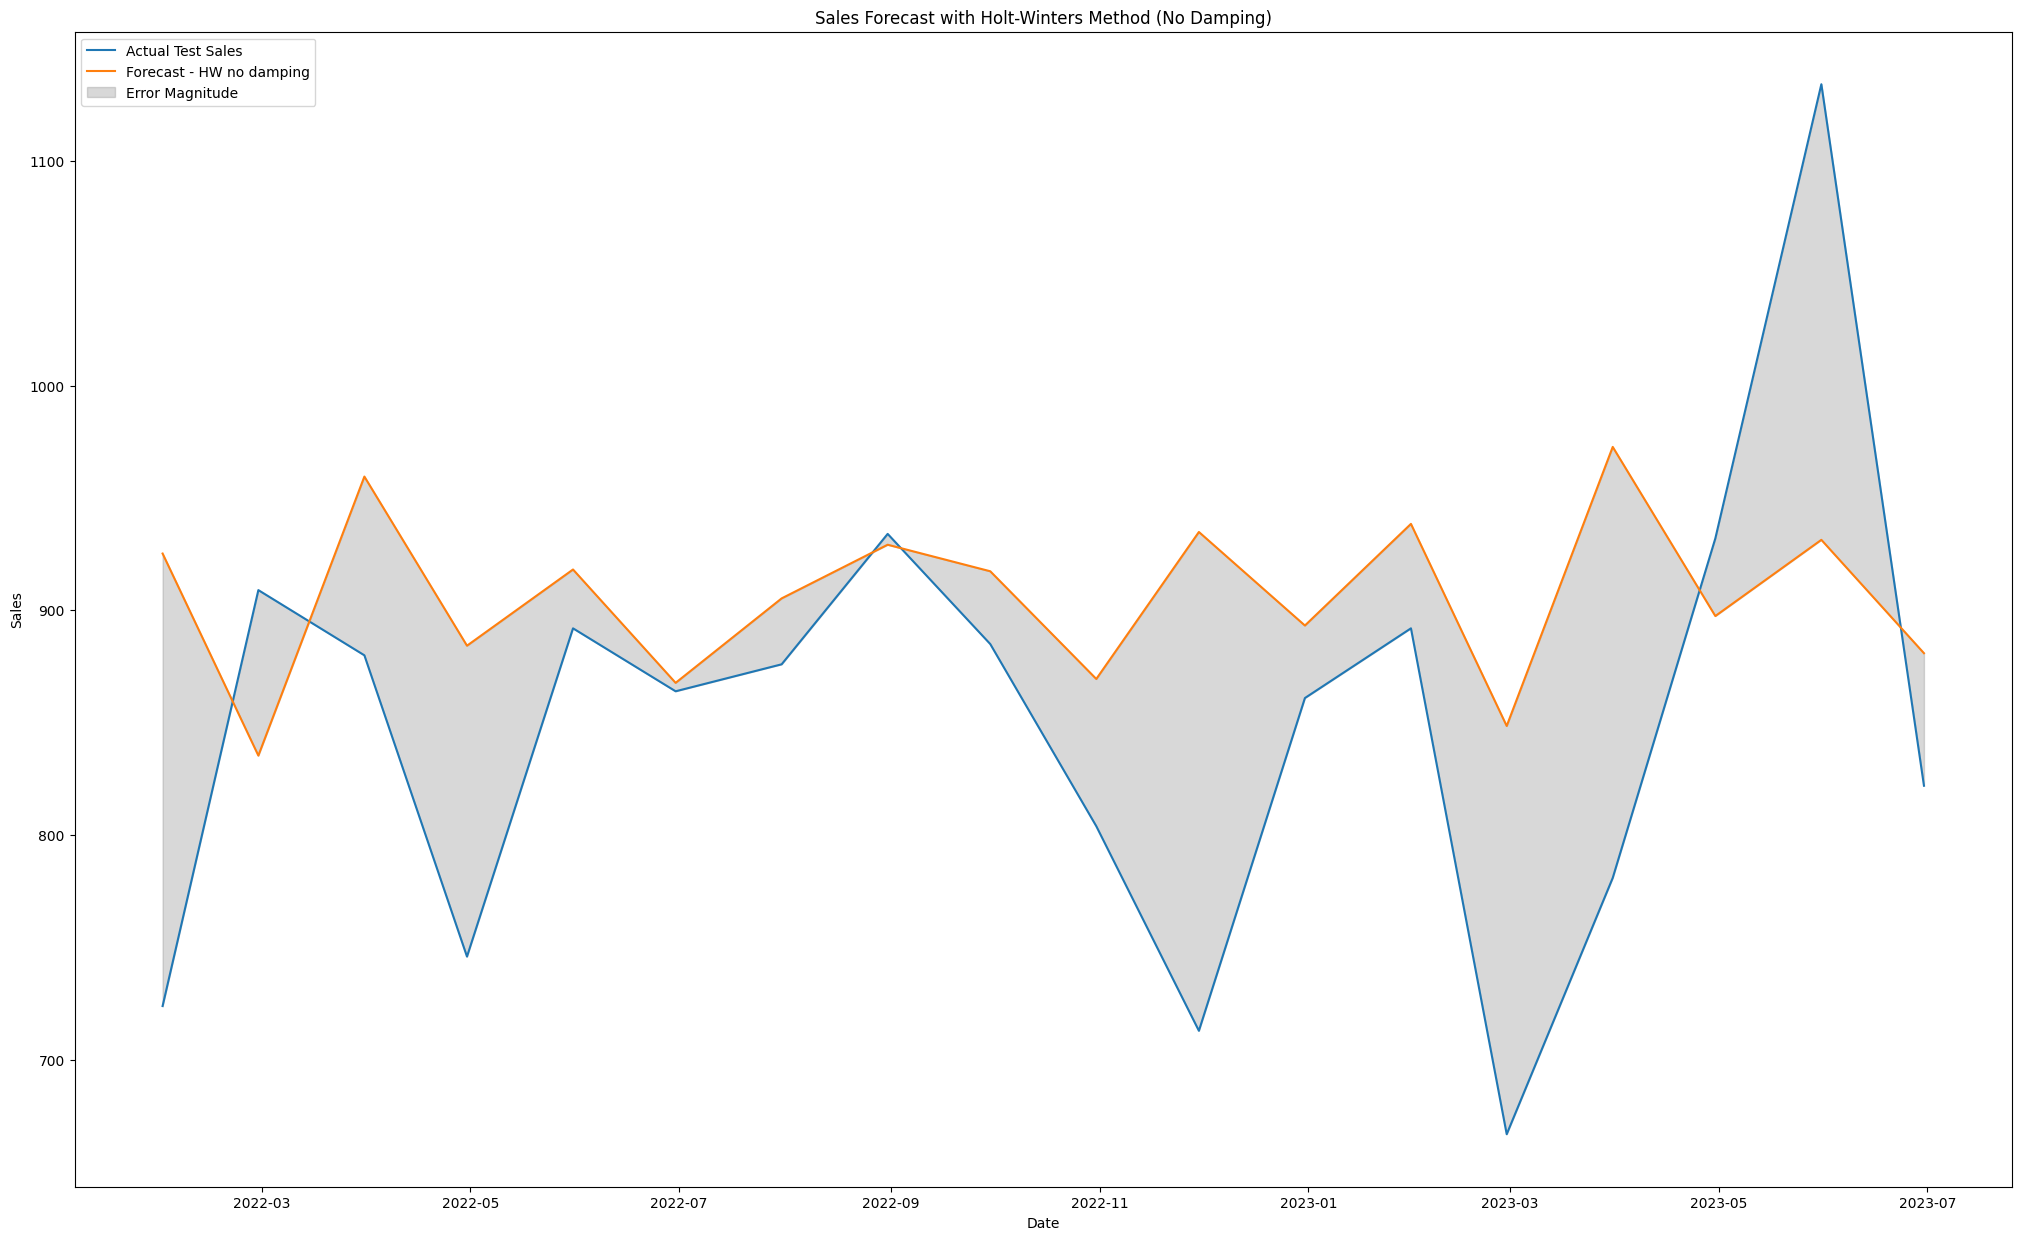

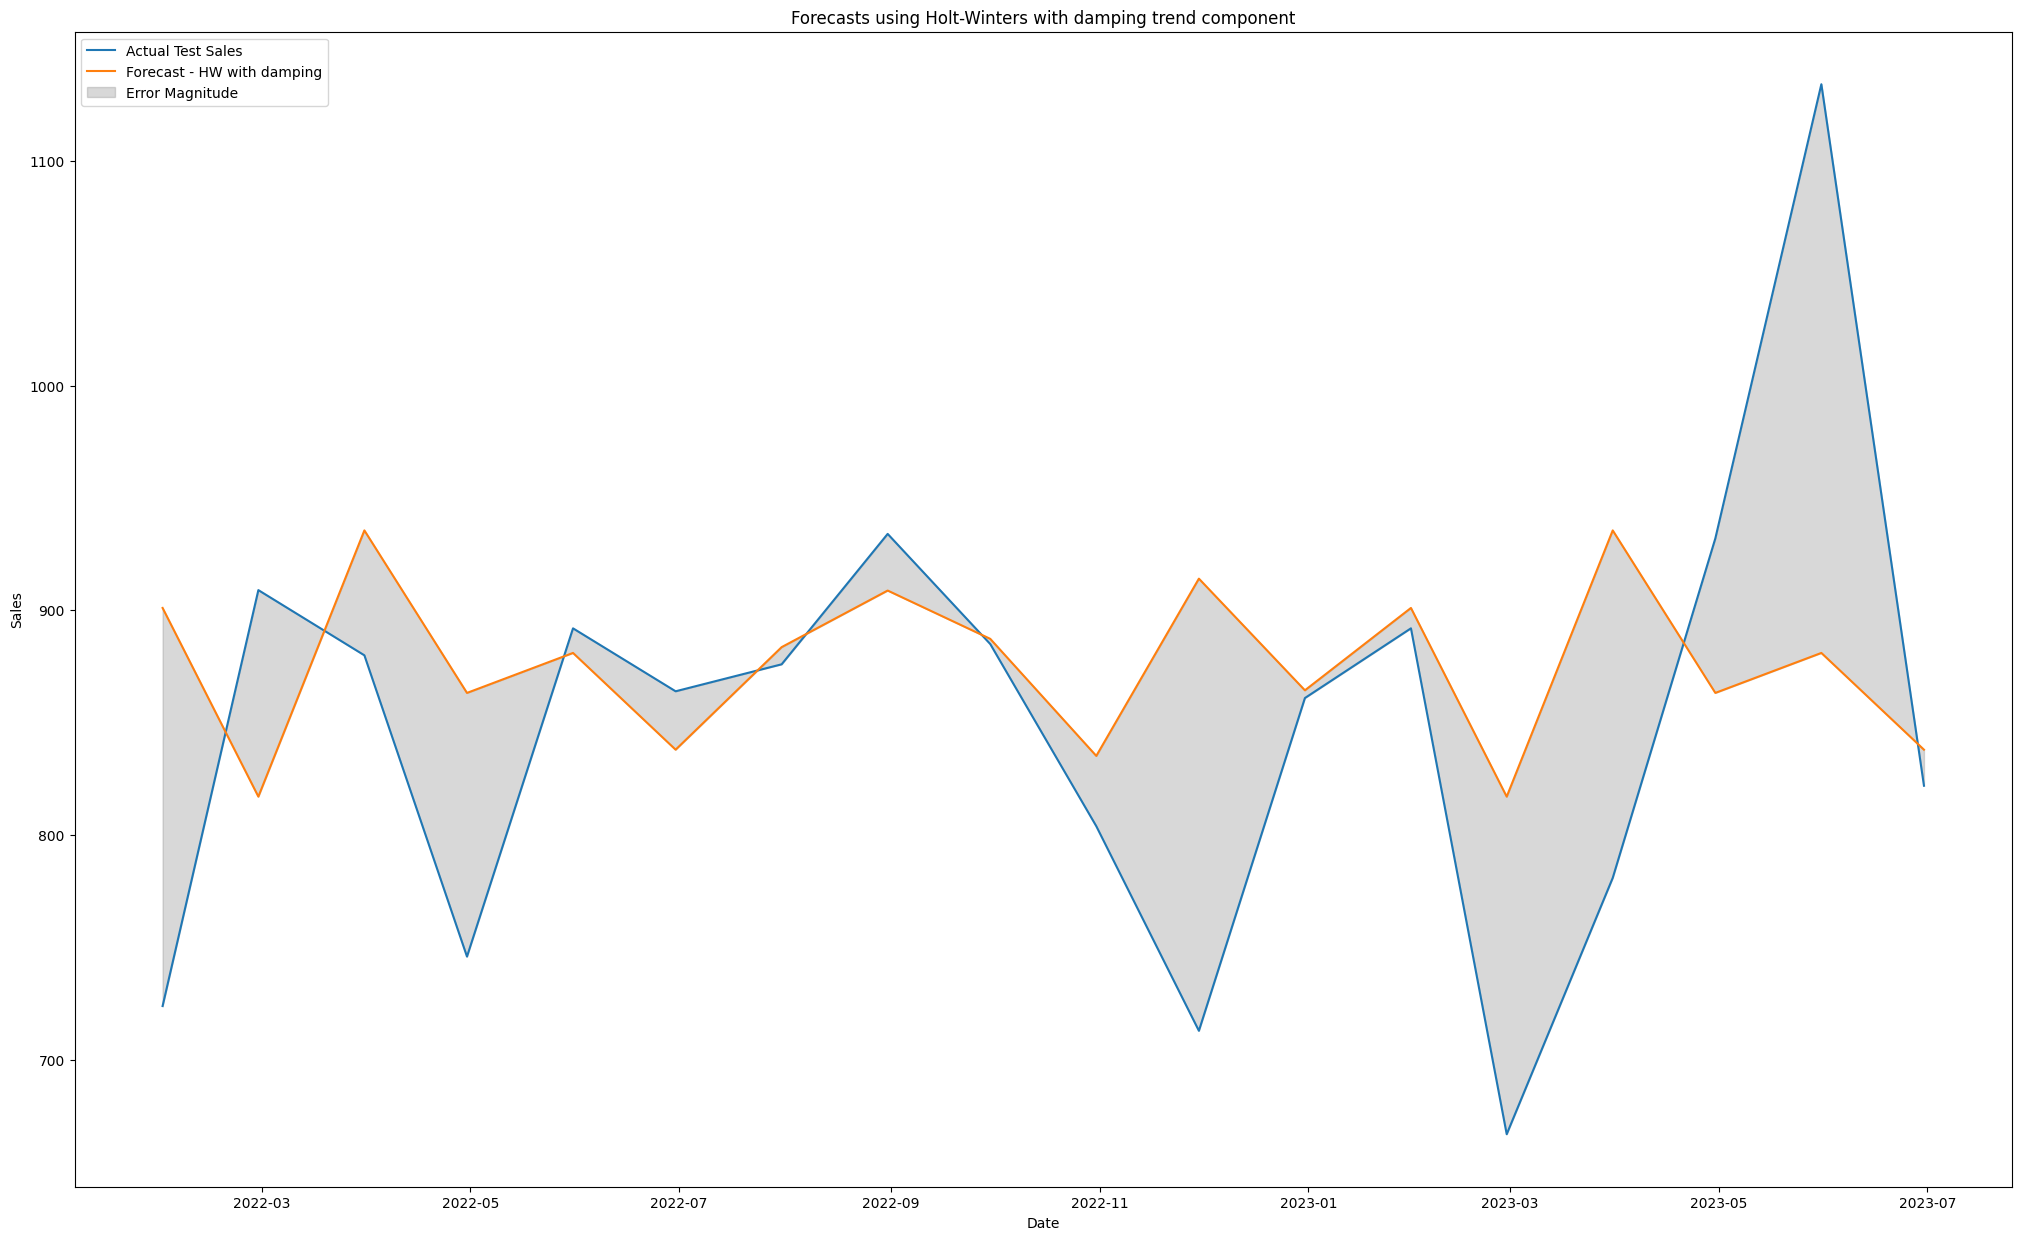

Results for Holt-Winters Model:


,Metric,Value (No Damping),Value (With Damping)
0,MAE,90.251188,77.838703
1,RMSE,116.939997,109.297916
2,R2,-0.287663,-0.124863
3,Accuracy,-28.766279,-12.486331



Total Actual Sales: 15316.00
Total Predicted Sales (No Damping): 16309.31
Total Predicted Sales (With Damping): 15765.82


In [10]:
df = pd.read_csv('C:/Users/moham/Desktop/ItemSixMS.csv')
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df.set_index('date', inplace=True)
df = df[(df['store'] == 1)]
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]
hw_model_1 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit_1 = hw_model_1.fit(optimized=True)
pred_fit_1 = hw_fit_1.forecast(steps=len(test_df))
pred_fit_1.index = test_df.index
hw_model_2 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12, damped=True)
hw_fit_2 = hw_model_2.fit(optimized=True)
pred_fit_2 = hw_fit_2.forecast(steps=len(test_df))
pred_fit_2.index = test_df.index
plt.figure(figsize=(25,15))
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_1, label='Forecast - HW no damping')
plt.fill_between(test_df.index, test_df['sales'], pred_fit_1, color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Sales Forecast with Holt-Winters Method (No Damping)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
plt.figure(figsize=(25,15))
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_2, label='Forecast - HW with damping')
plt.fill_between(test_df.index, test_df['sales'], pred_fit_2, color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Forecasts using Holt-Winters with damping trend component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
from sklearn.metrics import median_absolute_error, explained_variance_score
def msle(y_true, y_pred): 
    return mean_squared_error(np.log1p(y_true), np.log1p(y_pred))
def mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100
def adjusted_r2(r_squared, n, k): 
    return 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
def calculate_metrics(test_df, predictions):
    mae = np.mean(np.abs(test_df['sales'] - predictions))
    rmse = sqrt(mean_squared_error(test_df['sales'], predictions))
    r2 = r2_score(test_df['sales'], predictions)
    accuracy = r2 * 100  
    return mae, rmse, r2, accuracy
mae_1, rmse_1, r2_1, accuracy_1 = calculate_metrics(test_df, pred_fit_1)
mae_2, rmse_2, r2_2, accuracy_2 = calculate_metrics(test_df, pred_fit_2)
total_actual_sales = test_df['sales'].sum()
total_predicted_sales_no_damping = pred_fit_1.sum()
total_predicted_sales_with_damping = pred_fit_2.sum()
results_hw = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R2', 'Accuracy'],
    'Value (No Damping)': [mae_1, rmse_1, r2_1, accuracy_1],
    'Value (With Damping)': [mae_2, rmse_2, r2_2, accuracy_2]
})
print("Results for Holt-Winters Model:")
display(results_hw)
print("\nTotal Actual Sales: {:.2f}".format(total_actual_sales))
print("Total Predicted Sales (No Damping): {:.2f}".format(total_predicted_sales_no_damping))
print("Total Predicted Sales (With Damping): {:.2f}".format(total_predicted_sales_with_damping))

________________________________________________________________________________________________________________________________
# Forecast For All The Store Items:
- The same previous steps will be repated.

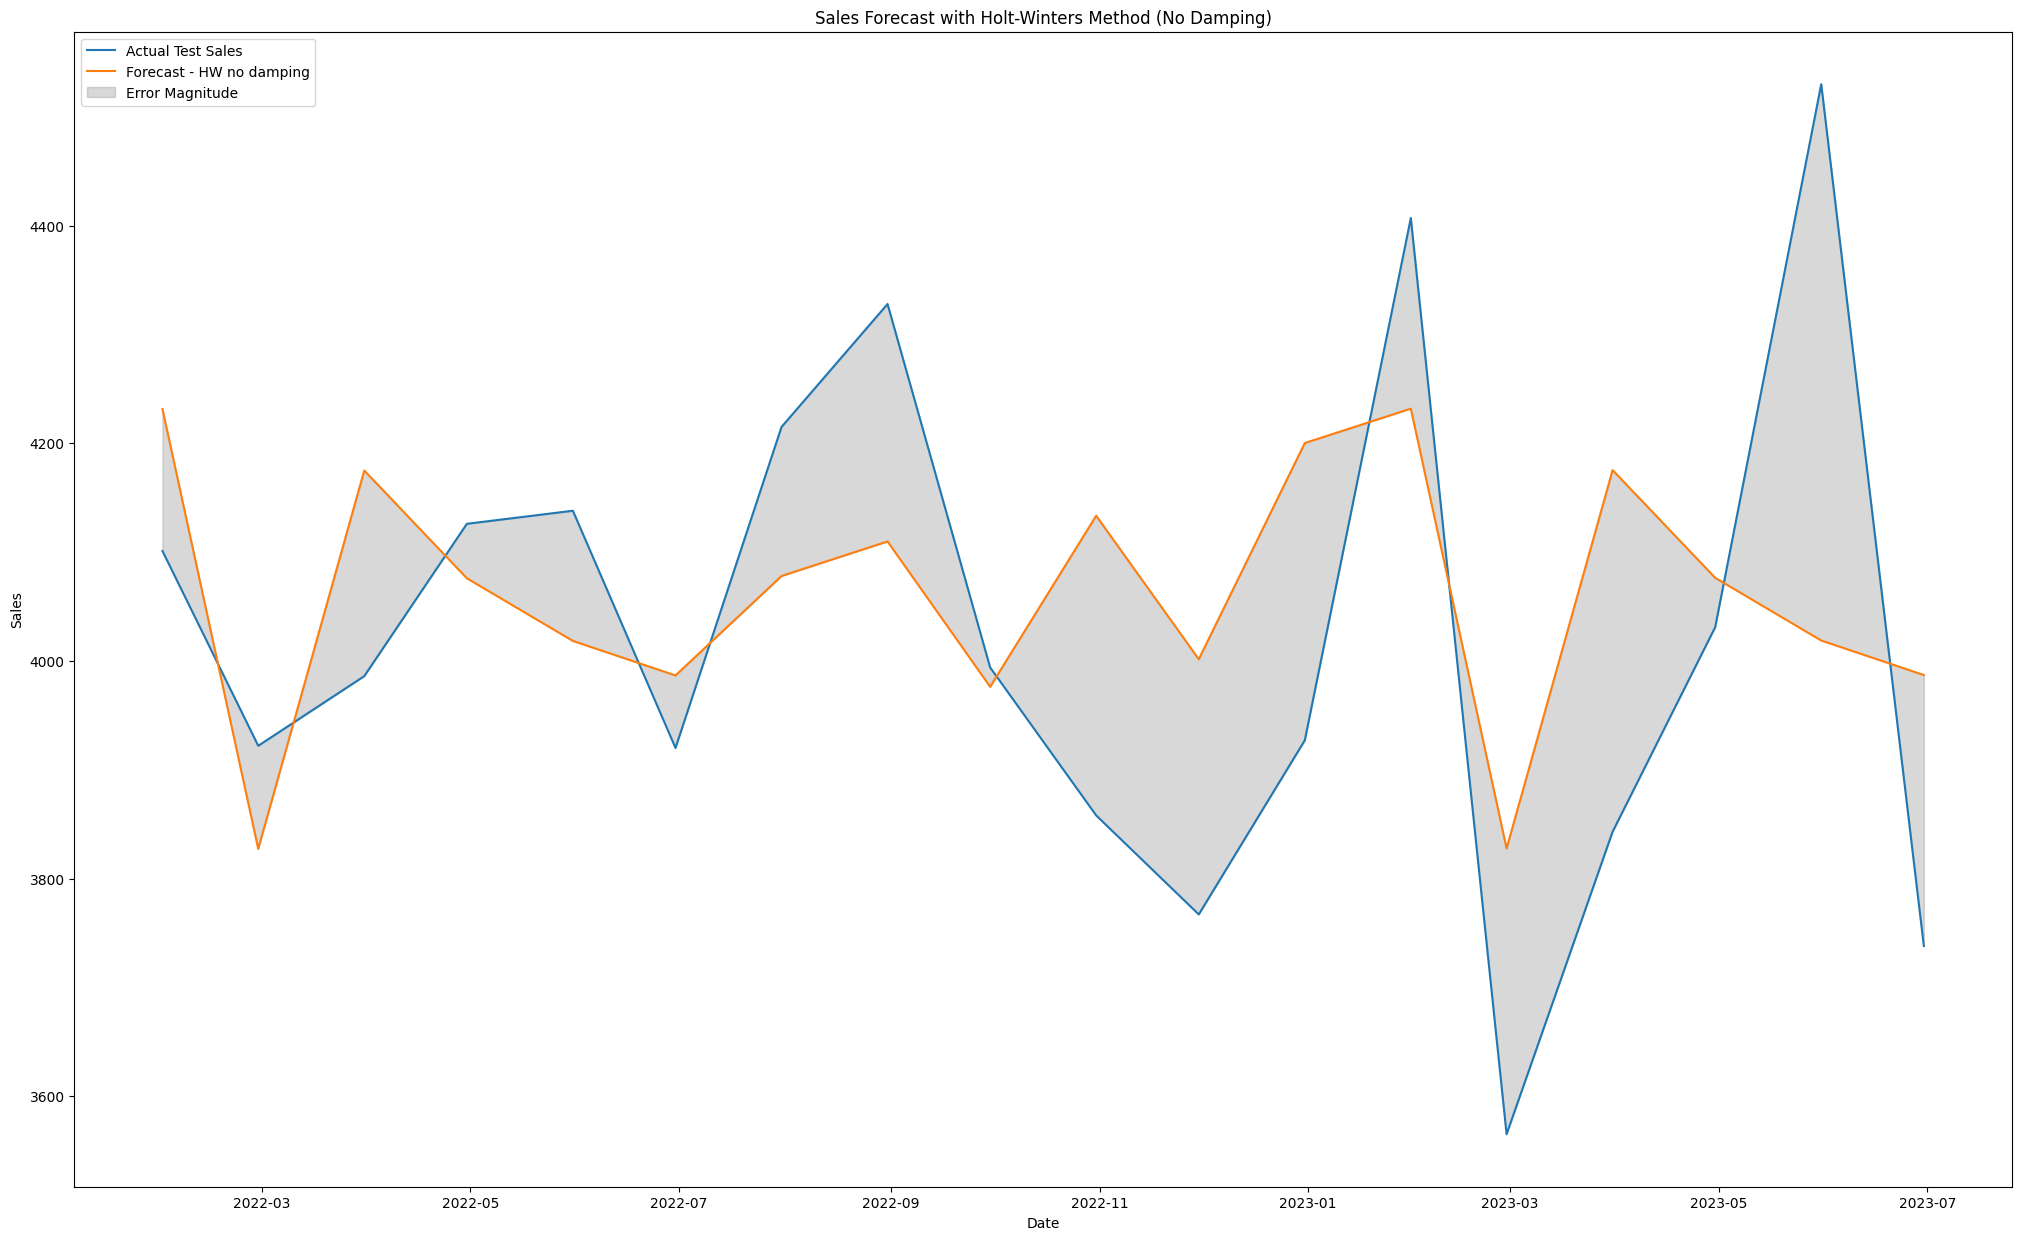

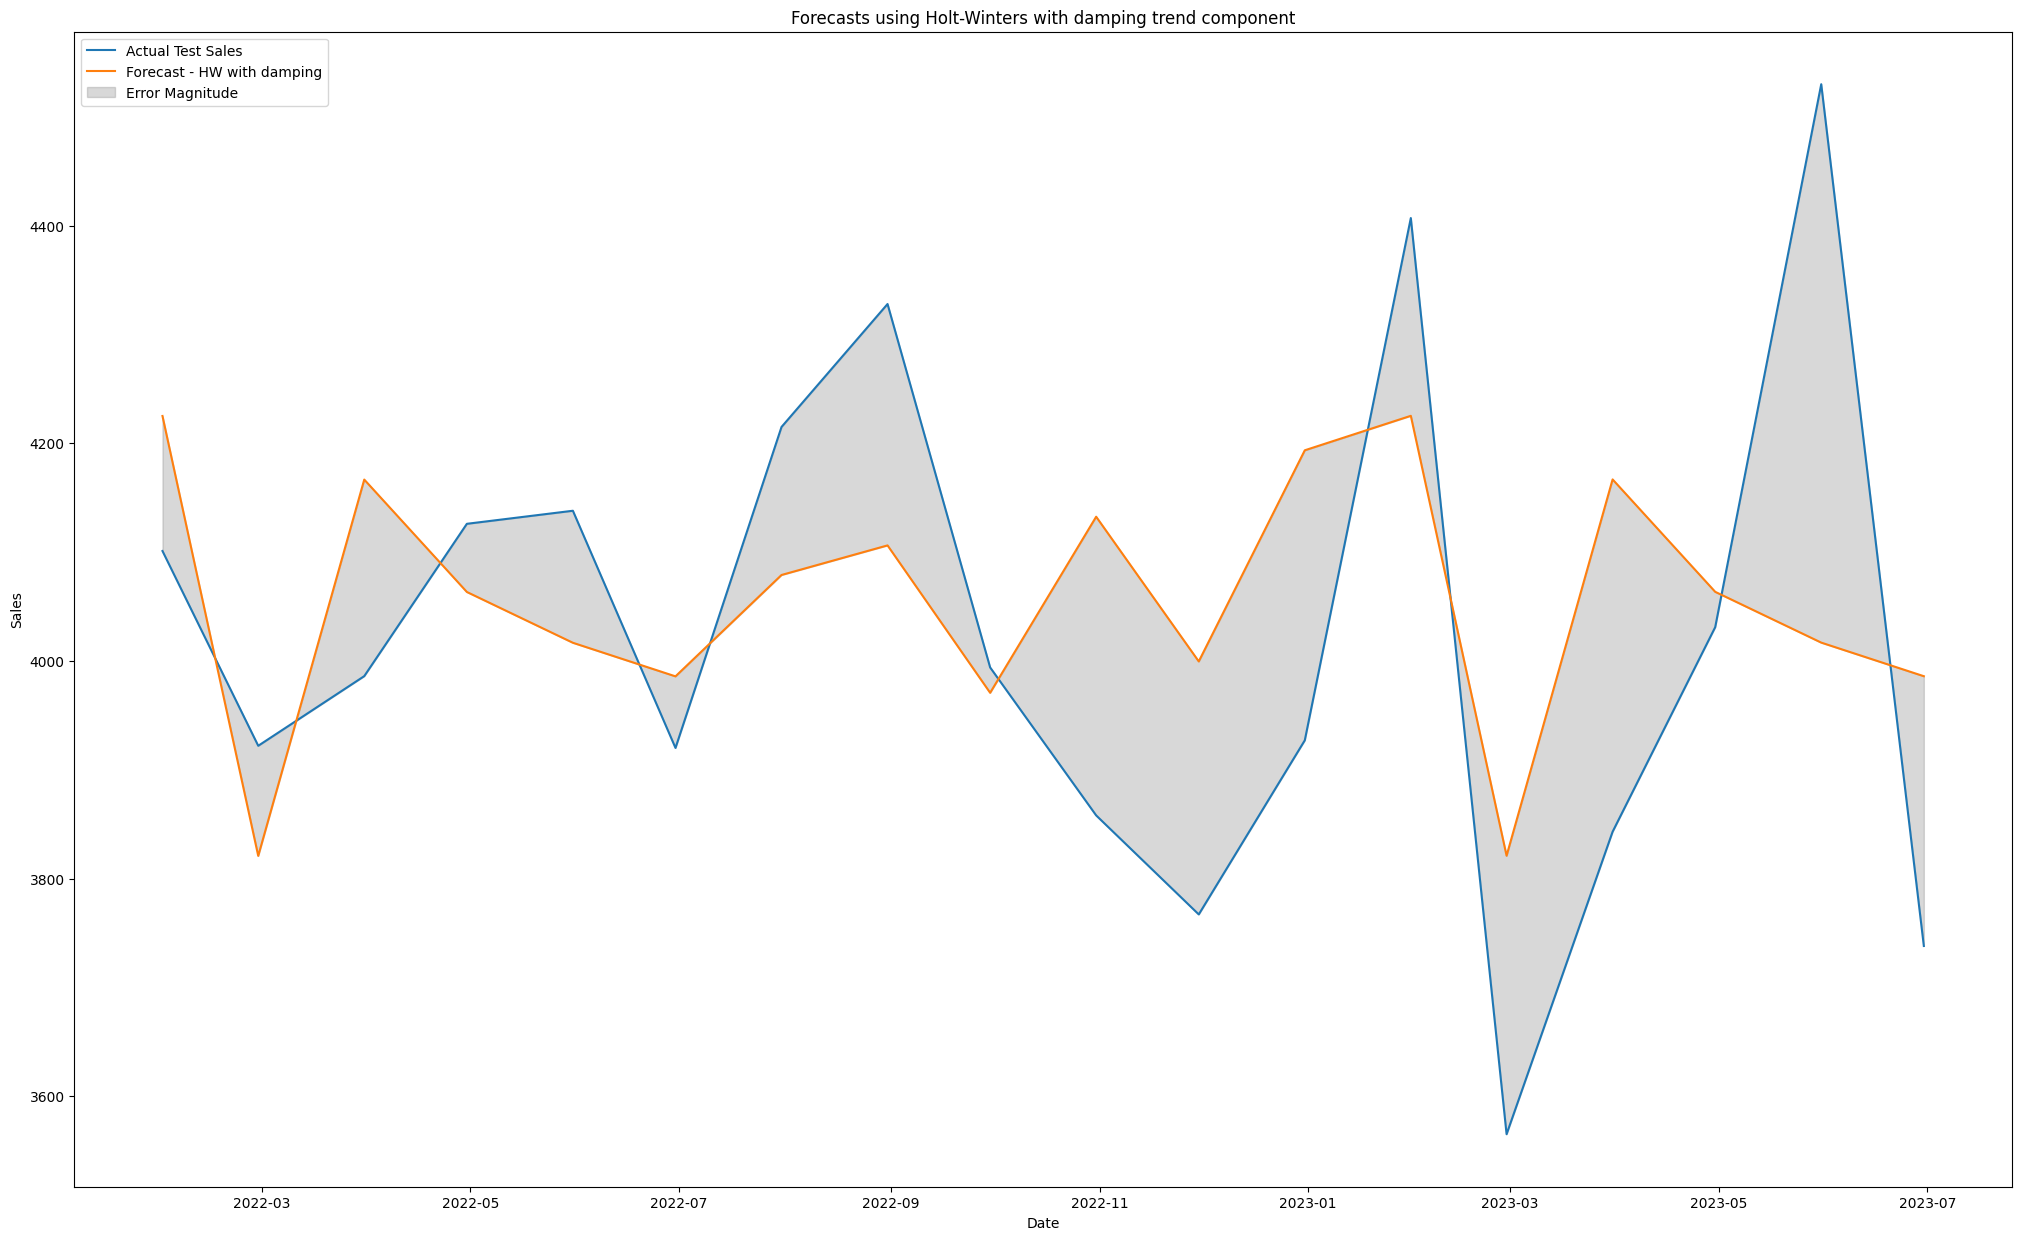

Results for Holt-Winters Model:


,Metric,Value (No Damping),Value (With Damping)
0,MAE,187.913858,186.980323
1,RMSE,222.455342,221.017739
2,R2,0.120454,0.131785
3,Accuracy,12.045411,13.178539



Total Actual Sales: 72396.00
Total Predicted Sales (No Damping): 73130.77
Total Predicted Sales (With Damping): 73038.94


In [11]:
df = pd.read_csv('C:/Users/moham/Desktop/storeItemsMS.csv')
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df.set_index('date', inplace=True)
df = df[(df['store'] == 1)]
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]
hw_model_1 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit_1 = hw_model_1.fit(optimized=True)
pred_fit_1 = hw_fit_1.forecast(steps=len(test_df))
pred_fit_1.index = test_df.index
hw_model_2 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12, damped=True)
hw_fit_2 = hw_model_2.fit(optimized=True)
pred_fit_2 = hw_fit_2.forecast(steps=len(test_df))
pred_fit_2.index = test_df.index
plt.figure(figsize=(25,15))
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_1, label='Forecast - HW no damping')
plt.fill_between(test_df.index, test_df['sales'], pred_fit_1, color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Sales Forecast with Holt-Winters Method (No Damping)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
plt.figure(figsize=(25,15))
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_2, label='Forecast - HW with damping')
plt.fill_between(test_df.index, test_df['sales'], pred_fit_2, color='gray', alpha=0.3, label='Error Magnitude')
plt.title('Forecasts using Holt-Winters with damping trend component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
from sklearn.metrics import median_absolute_error, explained_variance_score
def msle(y_true, y_pred): 
    return mean_squared_error(np.log1p(y_true), np.log1p(y_pred))
def mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100
def adjusted_r2(r_squared, n, k): 
    return 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
def calculate_metrics(test_df, predictions):
    mae = np.mean(np.abs(test_df['sales'] - predictions))
    rmse = sqrt(mean_squared_error(test_df['sales'], predictions))
    r2 = r2_score(test_df['sales'], predictions)
    accuracy = r2 * 100  
    return mae, rmse, r2, accuracy
mae_1, rmse_1, r2_1, accuracy_1 = calculate_metrics(test_df, pred_fit_1)
mae_2, rmse_2, r2_2, accuracy_2 = calculate_metrics(test_df, pred_fit_2)
total_actual_sales = test_df['sales'].sum()
total_predicted_sales_no_damping = pred_fit_1.sum()
total_predicted_sales_with_damping = pred_fit_2.sum()
results_hw = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R2', 'Accuracy'],
    'Value (No Damping)': [mae_1, rmse_1, r2_1, accuracy_1],
    'Value (With Damping)': [mae_2, rmse_2, r2_2, accuracy_2]
})
print("Results for Holt-Winters Model:")
display(results_hw)
print("\nTotal Actual Sales: {:.2f}".format(total_actual_sales))
print("Total Predicted Sales (No Damping): {:.2f}".format(total_predicted_sales_no_damping))
print("Total Predicted Sales (With Damping): {:.2f}".format(total_predicted_sales_with_damping))